## 1. Importing Libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE 
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.discrete.discrete_model import Logit


Bad key "text.kerning_factor" on line 4 in
C:\Users\Shubham\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## 2. Reading and Examining the Data

Objectives:
- Reading the data
- Checking the shape of the data
- Checking number of unique values in the all columns
- Checking the description of numerical data
- Examining data and finding important variables related to Business Requirement

In [2]:
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# Checking the shape of the data
telecom.shape

(99999, 226)

In [4]:
# Checking number of unique values in the data
def get_nunique(df):
    nunique_df = pd.DataFrame(df.nunique().sort_values(ascending = True))
    nunique_df.reset_index(inplace=True)
    nunique_df.columns = ['Column_Name', 'Number of Unique Values']
    return nunique_df

get_nunique(telecom)

,Column_Name,Number of Unique Values
0,std_ic_t2o_mou_6,1
1,std_og_t2c_mou_8,1
2,std_og_t2c_mou_9,1
3,std_ic_t2o_mou_9,1
4,std_ic_t2o_mou_8,1
5,std_og_t2c_mou_7,1
6,std_ic_t2o_mou_7,1
7,last_date_of_month_9,1
8,std_og_t2c_mou_6,1
9,last_date_of_month_7,1


#### Inferences:
- Columns with only 1 unique value can be dropped as they are redunant columns.
- Columns with 2 unique values are binary categorical columns and can be replaced with `'Yes'` and `'No'`.
- Columns with the prefixes `'monthly'`, `'sachet'` denote schemes as per the data dictionary, should be considered as categorical columns and must be encoded.
- Column `'mobile_number'` can be dropped as it has all unique values and therefore is redundant.

### Checking info and describing the numerical columns

In [5]:
telecom.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

#### Inference:
- All the object columns are actually date columns and must be converted into datetime format.

In [6]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
# Checking Column Names containing rech/amt in them
nunique_df = get_nunique(telecom)
cols_rech_amt = nunique_df['Column_Name'][nunique_df['Column_Name'].str.contains('rech|amt')].to_list()
cols_rech_amt

['count_rech_3g_6',
 'count_rech_3g_9',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'date_of_last_rech_data_9',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_data_8',
 'count_rech_2g_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_8',
 'count_rech_2g_9',
 'count_rech_2g_8',
 'count_rech_2g_7',
 'total_rech_data_6',
 'total_rech_data_9',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_9',
 'max_rech_data_8',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_num_7',
 'total_rech_num_6',
 'last_day_rch_amt_7',
 'max_rech_amt_7',
 'last_day_rch_amt_9',
 'last_day_rch_amt_6',
 'last_day_rch_amt_8',
 'max_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_9',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'total_rech_amt_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

#### Notes:
- Columns with prefix `'total_rech_amt'` and `'av_rech_amt_data'` are important as they will be useful in filtering out high value customers.
- Columns with prefix `'total_rech_data'` and `'av_rech_amt_data'` can help us determine the total average consumption of data.

## 3. Data Cleaning

Objectives:
- Dropping redundant columns
- Converting the columns to appropriate data type
- Checking and handling missing values
- Below actions as per business requirement:
> 1. Deriving new variables
> 2. Filtering out high value customers
> 3. Tagging churners based on month 9

### Dropping columns with only 1 unique value and mobile_number column

In [8]:
drop_cols = nunique_df[(nunique_df['Number of Unique Values'] == 1) | (nunique_df['Column_Name'] == 'mobile_number')]['Column_Name'].to_list()
telecom.drop(drop_cols, 1, inplace=True)

In [9]:
# Converting object columns into datetime format
cols = list(telecom.select_dtypes('object').columns)
telecom[cols] = telecom[cols].apply(lambda x: pd.to_datetime(x, errors = 'coerce', format = '%m/%d/%Y'))

In [10]:
# # To obtain all columns based on the months
# var = ['_6', '_7', '_8', '_9']
# cols = telecom.columns
# d = {}
# for col in cols:
#     for v in var:
#         if v in col:
#             if v in d:
#                 d[v].append(col)
#             else:
#                 d[v] = []

### Checking and handling missing values

In [11]:
# Defining a function to check for missing value % > 0
def missing(df):
    temp = pd.DataFrame(np.round(100*(df.isnull().sum() / len(df)), 2))
    temp.reset_index(inplace=True)
    temp.columns = ['Column_Name', 'Missing_Val_%']
    missing = temp[temp['Missing_Val_%'] > 0]
    missing = missing.sort_values('Missing_Val_%', ascending = False)
    if len(missing) != 0:
        return missing
    else:
        print('No missing values in the dataframe!')

In [12]:
temp = missing(telecom)
temp

,Column_Name,Missing_Val_%
156,count_rech_3g_6,74.85
200,fb_user_6,74.85
176,arpu_2g_6,74.85
160,av_rech_amt_data_6,74.85
180,night_pck_user_6,74.85
152,count_rech_2g_6,74.85
148,max_rech_data_6,74.85
172,arpu_3g_6,74.85
144,total_rech_data_6,74.85
140,date_of_last_rech_data_6,74.85


#### Inference:
- 40 columns have missing value % higher than 73% including important columns with prefixes `'av_rech_amt_data'` and `'total_rech_data'`.
- It can be observed that across the months 6, 7, 8 and 9 the missing value % for the columns with prefixes `'total_rech_data', 'max_rech_data' and 'av_rech_amt_data'` is same with respect to the months.
- It can be safe to assume that the users for whom the data is missing had not done a recharge for their data. Therefore, the values can be imputed with zero.

In [13]:
# Imputing the above mentioned columns with zero

cols = ['total_rech_data_6', 'max_rech_data_6','av_rech_amt_data_6',
       'total_rech_data_7', 'max_rech_data_7', 'av_rech_amt_data_7',
       'total_rech_data_8', 'max_rech_data_8', 'av_rech_amt_data_8',
       'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9']

telecom[cols] = telecom[cols].fillna(0)
telecom[cols].head()

,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6,total_rech_data_7,max_rech_data_7,av_rech_amt_data_7,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,total_rech_data_9,max_rech_data_9,av_rech_amt_data_9
0,1.0,252.0,252.0,1.0,252.0,252.0,1.0,252.0,252.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,154.0,154.0,2.0,25.0,50.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,46.0,46.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,56.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Checking missing values % again
temp = missing(telecom)
temp

,Column_Name,Missing_Val_%
152,count_rech_2g_6,74.85
200,fb_user_6,74.85
172,arpu_3g_6,74.85
156,count_rech_3g_6,74.85
180,night_pck_user_6,74.85
176,arpu_2g_6,74.85
140,date_of_last_rech_data_6,74.85
153,count_rech_2g_7,74.43
173,arpu_3g_7,74.43
181,night_pck_user_7,74.43


####  Dropping columns with more than 50% missing values as they are redunant 

In [15]:
drop_col = temp[temp['Missing_Val_%'] > 50]['Column_Name'].to_list()
telecom.drop(drop_col, 1, inplace = True)

In [16]:
# Checking missing values % again
missing(telecom)

,Column_Name,Missing_Val_%
75,loc_ic_t2t_mou_9,7.75
23,loc_og_t2t_mou_9,7.75
27,loc_og_t2m_mou_9,7.75
63,spl_og_mou_9,7.75
99,std_ic_t2f_mou_9,7.75
35,loc_og_t2c_mou_9,7.75
95,std_ic_t2m_mou_9,7.75
39,loc_og_mou_9,7.75
43,std_og_t2t_mou_9,7.75
91,std_ic_t2t_mou_9,7.75


In [17]:
# Checking dtypes of missing columns and converting missing value df to dict
temp = missing(telecom)
missing_dict = temp.set_index('Column_Name').to_dict()
missing_dict = missing_dict['Missing_Val_%']
cols = temp['Column_Name'].to_list()
telecom[cols].dtypes

loc_ic_t2t_mou_9              float64
loc_og_t2t_mou_9              float64
loc_og_t2m_mou_9              float64
spl_og_mou_9                  float64
std_ic_t2f_mou_9              float64
loc_og_t2c_mou_9              float64
std_ic_t2m_mou_9              float64
loc_og_mou_9                  float64
std_og_t2t_mou_9              float64
std_ic_t2t_mou_9              float64
std_og_t2m_mou_9              float64
loc_ic_t2m_mou_9              float64
loc_ic_mou_9                  float64
std_og_t2f_mou_9              float64
isd_og_mou_9                  float64
std_og_mou_9                  float64
loc_ic_t2f_mou_9              float64
std_ic_mou_9                  float64
loc_og_t2f_mou_9              float64
offnet_mou_9                  float64
isd_ic_mou_9                  float64
onnet_mou_9                   float64
spl_ic_mou_9                  float64
roam_ic_mou_9                 float64
roam_og_mou_9                 float64
ic_others_9                   float64
og_others_9 

#### Inference:
- Imputing the continuous numeric missing columuns values > 5% with the median and less than 5% with 0.
- Imputing the datetime missing values with zero.

In [18]:
for col in cols:
    if (telecom[col].dtype == 'float64') & (missing_dict[col] < 5):
        telecom[col] = telecom[col].fillna(0)
    elif telecom[col].dtype == 'float64':
        telecom[col] = telecom[col].fillna(telecom[col].median())
    else:
        telecom[col] = telecom[col].fillna(0)

In [19]:
# Checking missing values % again
missing(telecom)

No missing values in the dataframe!


In [20]:
# Converting the columns with prefixes 'sachet' and 'monthly' to string format as they are schemes and should be considered as objects
cols= list(telecom.columns[telecom.columns.str.contains('sachet|monthly')])
for col in cols:
    telecom[col] = telecom[col].apply(str)
    telecom[col] = telecom[col].apply(lambda x: x.replace(x, 'Scheme_'+x))

### Deriving new variables

In [21]:
# Creating a column for total recharge amount for data
telecom['total_rech_amt_data_6'] = telecom['av_rech_amt_data_6'] * telecom['total_rech_data_6']
telecom['total_rech_amt_data_7'] = telecom['av_rech_amt_data_7'] * telecom['total_rech_data_7']
telecom['total_rech_amt_data_8'] = telecom['av_rech_amt_data_8'] * telecom['total_rech_data_8']
telecom['total_rech_amt_data_9'] = telecom['av_rech_amt_data_9'] * telecom['total_rech_data_9']

In [22]:
# Creating a column to get the average recharge amount in first two months (good phase)
telecom['total_average_rech_amt_6_7'] = (telecom['total_rech_amt_data_6'] + telecom['total_rech_amt_data_7']
                                  + telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'])/2

### Filtering out high value customers

In [23]:
# Filtering out customers who have total average recharge amount for 6 and 7 months > 70th percentile 
filter_quantile = np.quantile(telecom['total_average_rech_amt_6_7'], 0.7)
filtered_df = telecom[telecom['total_average_rech_amt_6_7'] > filter_quantile]
filtered_df.shape

(29953, 186)

### Tagging churners and removing attributes of churn phase

- Tagging those customers who have not made any calls or used data in the churn month as churners.
- Attributes used for tagging churn:
>1. total_ic_mou_9
>2. total_og_mou_9
>3. vol_2g_mb_9
>4. vol_3g_mb_9

In [24]:
# Creating a new column for churn
filtered_df['churn'] = np.where((filtered_df['total_ic_mou_9'] == 0) & (filtered_df['total_og_mou_9'] == 0) & (filtered_df['vol_2g_mb_9'] == 0) & (filtered_df['vol_3g_mb_9'] == 0), 1, 0)

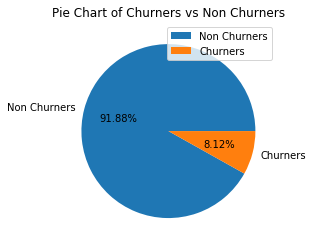

In [25]:
# Calculating the percentage of churners and non churners
churners = 100*filtered_df['churn'].value_counts(normalize=True)
plt.pie(churners, labels=['Non Churners', 'Churners'], autopct='%.2f%%')
plt.legend(loc='best')
plt.title('Pie Chart of Churners vs Non Churners')
plt.show()

#### Inference: 
- There clearly seems to be a class imbalance in the churn data which should be addressed 

In [26]:
# Dropping all columns with '_9' in them
cols = list(filtered_df.columns[filtered_df.columns.str.contains('_9|sep_vbc_3g')])
filtered_df.drop(cols, 1, inplace=True)

In [27]:
# Converting vbc into the format which is used in the data
filtered_df.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 
                            'jul_vbc_3g': 'vbc_3g_7',
                            'aug_vbc_3g': 'vbc_3g_8'}, inplace=True)

## 4. EDA

Objectives:
- Finding correlation between the variables, removing highly correlated variables
- Identifying important predictor variables using different plots
- Aggregate the average of 6 and 7 month columns in to 1 column and dropping the initial columns

In [28]:
filtered_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 141 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   arpu_6                      float64
 1   arpu_7                      float64
 2   arpu_8                      float64
 3   onnet_mou_6                 float64
 4   onnet_mou_7                 float64
 5   onnet_mou_8                 float64
 6   offnet_mou_6                float64
 7   offnet_mou_7                float64
 8   offnet_mou_8                float64
 9   roam_ic_mou_6               float64
 10  roam_ic_mou_7               float64
 11  roam_ic_mou_8               float64
 12  roam_og_mou_6               float64
 13  roam_og_mou_7               float64
 14  roam_og_mou_8               float64
 15  loc_og_t2t_mou_6            float64
 16  loc_og_t2t_mou_7            float64
 17  loc_og_t2t_mou_8            float64
 18  loc_og_t2m_mou_6            float64
 19  loc_og_t2m_mou_7        

In [29]:
# Checking the MOU columns and filtering out the various categories
mou_list = filtered_df.columns[filtered_df.columns.str.contains('mou')]
print(mou_list)
ic_mou = mou_list[mou_list.str.contains('ic')]
og_mou = mou_list[mou_list.str.contains('og')]
onnet_mou = mou_list[mou_list.str.contains('onnet')]
offnet_mou = mou_list[mou_list.str.contains('offnet')]

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

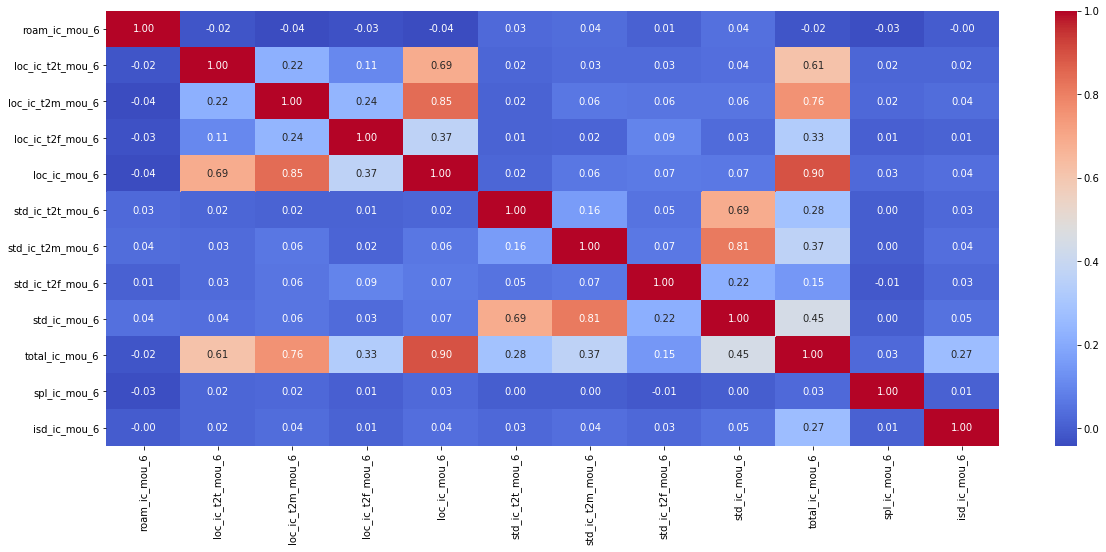

In [30]:
# Checking correlation between the incoming variables 
plt.figure(figsize=(20,8))
sns.heatmap(filtered_df[ic_mou[ic_mou.str.contains('_6')]].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

#### Inference:
- There is clearly high correlation among the variables `loc_ic_mou, total_ic_mou, std_ic_mou`, will be dropping the variables in order to avoid multi collinearity

In [31]:
# Dropping highly correlated columns
cols = filtered_df.columns[filtered_df.columns.str.contains('loc_ic_mou|total_ic_mou|std_ic_mou')]
filtered_df.drop(cols, 1, inplace=True)

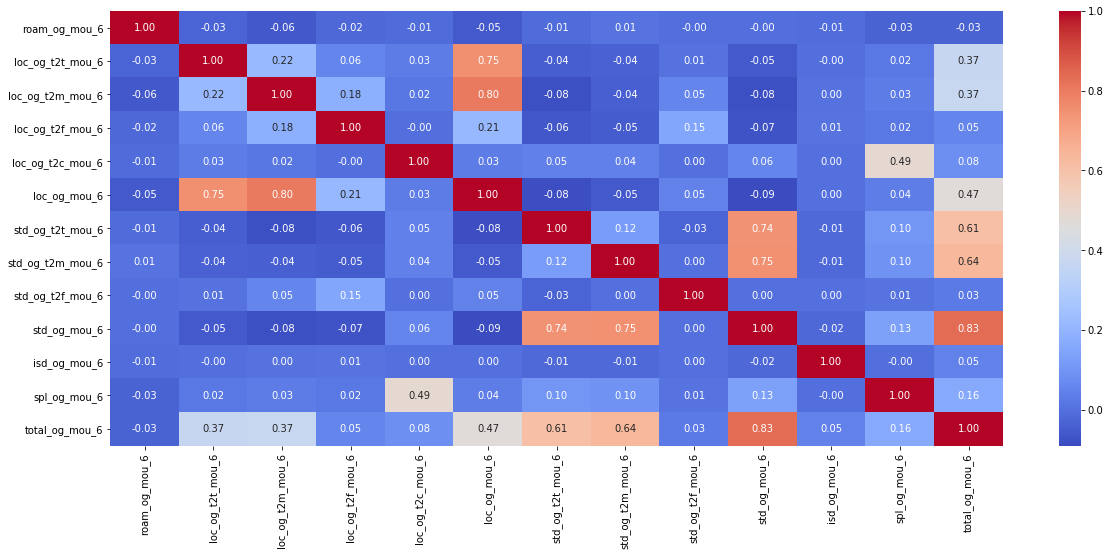

In [32]:
# Checking correlation between the outgoing variables
plt.figure(figsize=(20,8))
sns.heatmap(filtered_df[og_mou[og_mou.str.contains('_6')]].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

#### Inference:
- There is clearly high correlation among the variables `loc_og_mou, total_og_mou, std_og_mou`, will be dropping the variables in order to avoid multi collinearity

In [33]:
# Dropping highly correlated columns
cols = filtered_df.columns[filtered_df.columns.str.contains('loc_og_mou|total_og_mou|std_og_mou')]
filtered_df.drop(cols, 1, inplace=True)

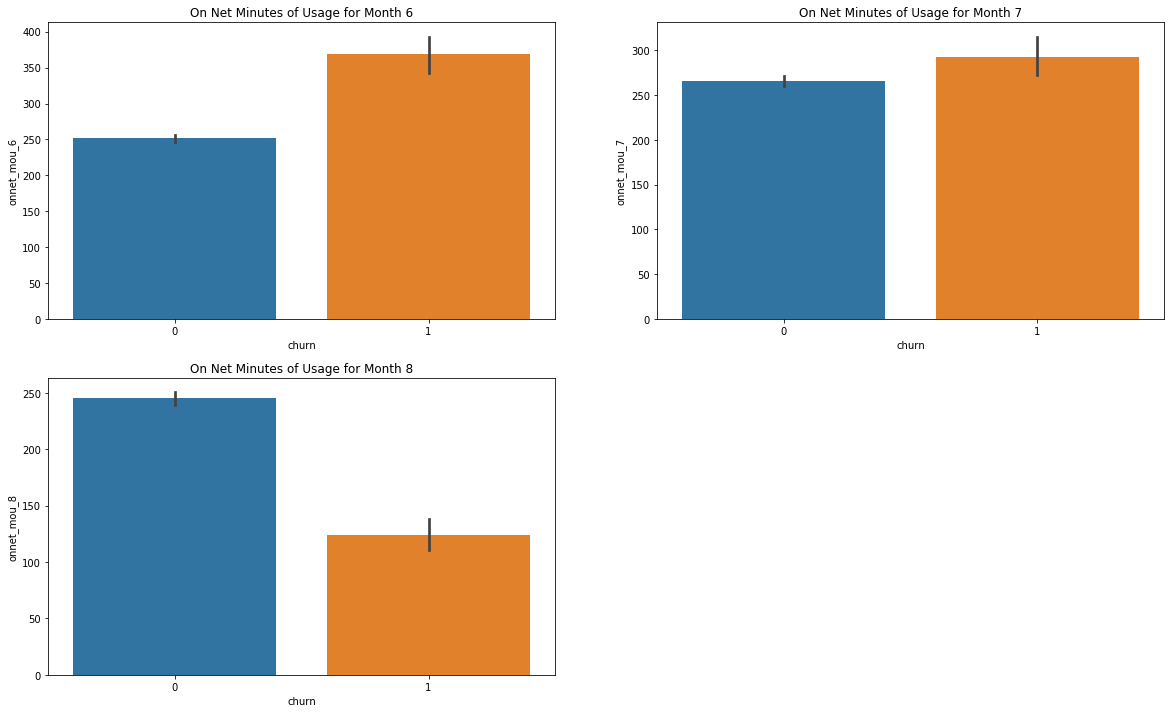

In [34]:
# Barplots of the onnet_mou across 6, 7, 8 months
plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.title('On Net Minutes of Usage for Month 6')
sns.barplot(data = filtered_df, x = 'churn', y = 'onnet_mou_6')
plt.subplot(222)
plt.title('On Net Minutes of Usage for Month 7')
sns.barplot(data = filtered_df, x = 'churn', y = 'onnet_mou_7')
plt.subplot(223)
plt.title('On Net Minutes of Usage for Month 8')
sns.barplot(data = filtered_df, x = 'churn', y = 'onnet_mou_8')
plt.show()

#### Inference:
- We can see a decline in Onnet minutes of usage among the churners, whereas the non-chuners are constantly around the 250 mark.

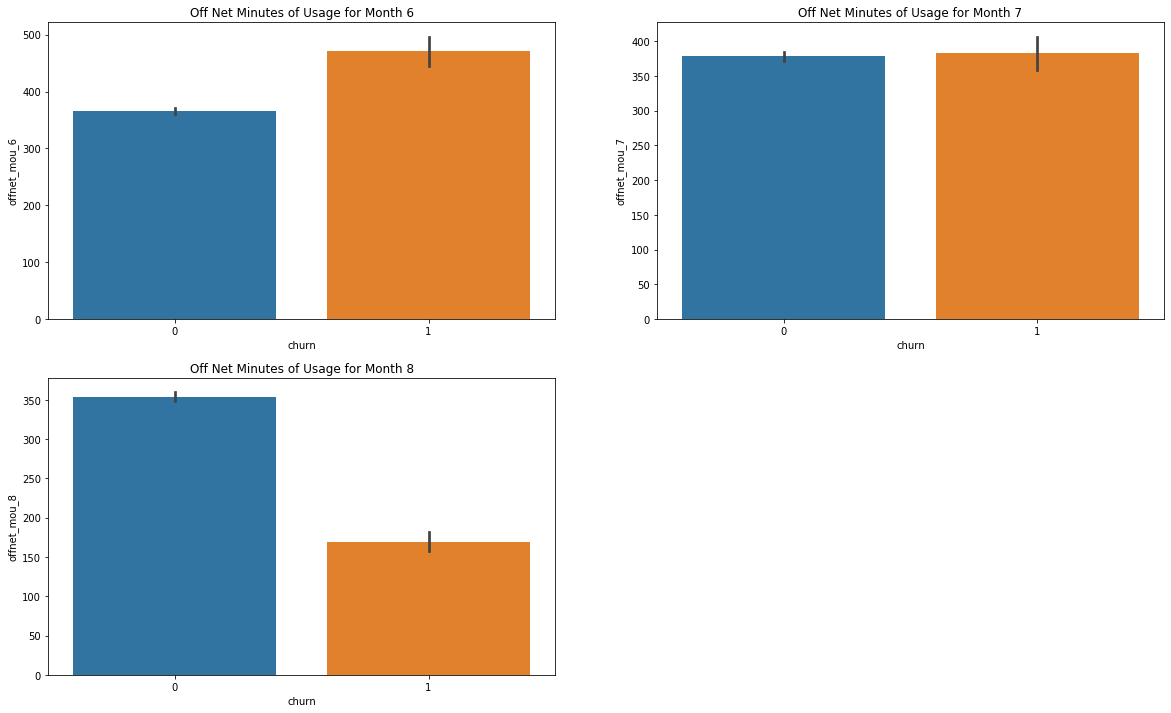

In [35]:
# Barplots of the offnet_mou across 6, 7, 8 months
plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.title('Off Net Minutes of Usage for Month 6')
sns.barplot(data = filtered_df, x = 'churn', y = 'offnet_mou_6')
plt.subplot(222)
plt.title('Off Net Minutes of Usage for Month 7')
sns.barplot(data = filtered_df, x = 'churn', y = 'offnet_mou_7')
plt.subplot(223)
plt.title('Off Net Minutes of Usage for Month 8')
sns.barplot(data = filtered_df, x = 'churn', y = 'offnet_mou_8')
plt.show()

#### Inference:
- We can see a decline in Offnet minutes of usage among the churners, whereas the non-chuners are constantly around the 350 mark.

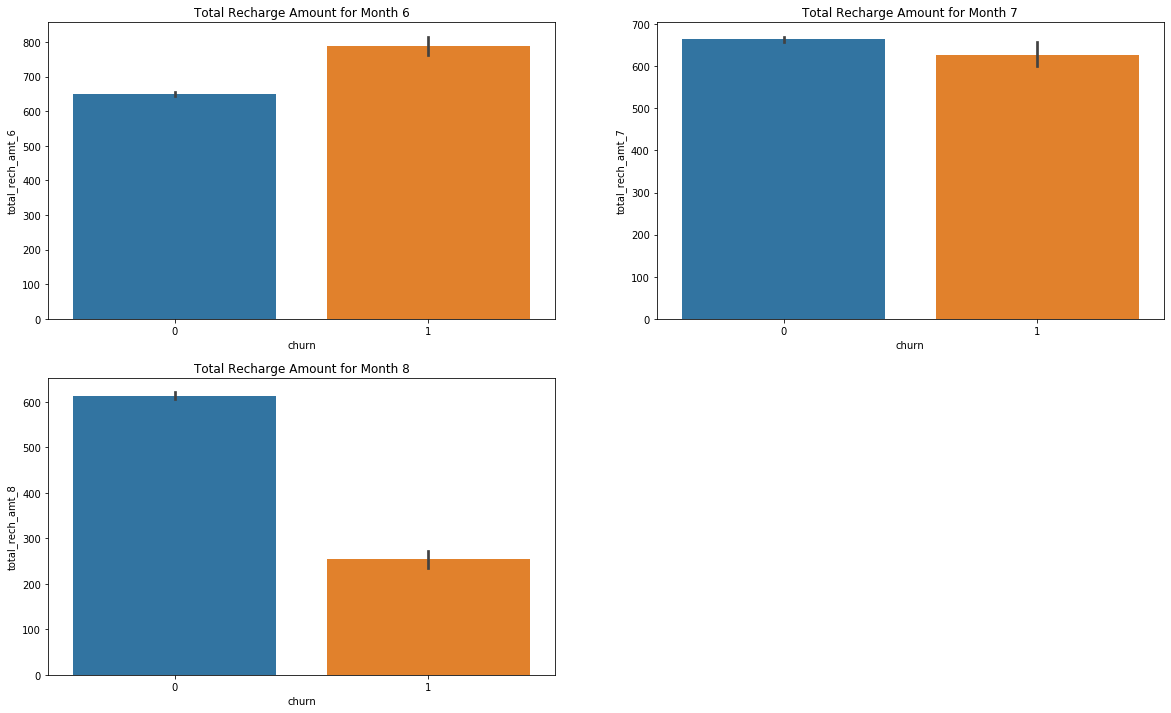

In [36]:
# Barplots of the Total recharge amount across 6, 7, 8 months
plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.title('Total Recharge Amount for Month 6')
sns.barplot(data = filtered_df, x = 'churn', y = 'total_rech_amt_6')
plt.subplot(222)
plt.title('Total Recharge Amount for Month 7')
sns.barplot(data = filtered_df, x = 'churn', y = 'total_rech_amt_7')
plt.subplot(223)
plt.title('Total Recharge Amount for Month 8')
sns.barplot(data = filtered_df, x = 'churn', y = 'total_rech_amt_8')
plt.show()

#### Inference:
- The total recharge amount was churners was higher than the non-churners in the 6th month, almost equal in the 7th month and dropped to almost half of non-churners in the 8th month
- The total recharge amount by non churners had been at the mark of 600 across the months 6, 7 and 8

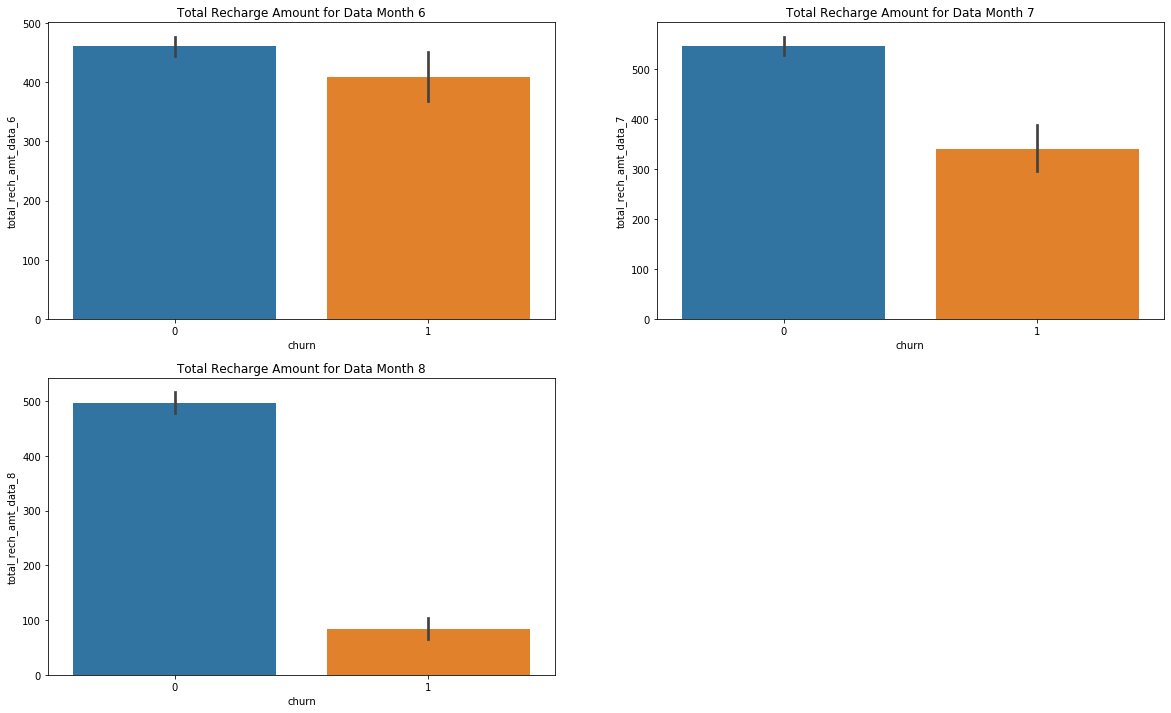

In [37]:
# Barplots of the Total recharge amount for data across 6, 7, 8 months
plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.title('Total Recharge Amount for Data Month 6')
sns.barplot(data = filtered_df, x = 'churn', y = 'total_rech_amt_data_6')
plt.subplot(222)
plt.title('Total Recharge Amount for Data Month 7')
sns.barplot(data = filtered_df, x = 'churn', y = 'total_rech_amt_data_7')
plt.subplot(223)
plt.title('Total Recharge Amount for Data Month 8')
sns.barplot(data = filtered_df, x = 'churn', y = 'total_rech_amt_data_8')
plt.show()

#### Inference:
- There is a gradual decrease in total recharge amount for data for the months 6 and 7, and a steep decrease in the month 8, among churners.
- The total recharge amount for data among non-churners in constant over the months, around 500

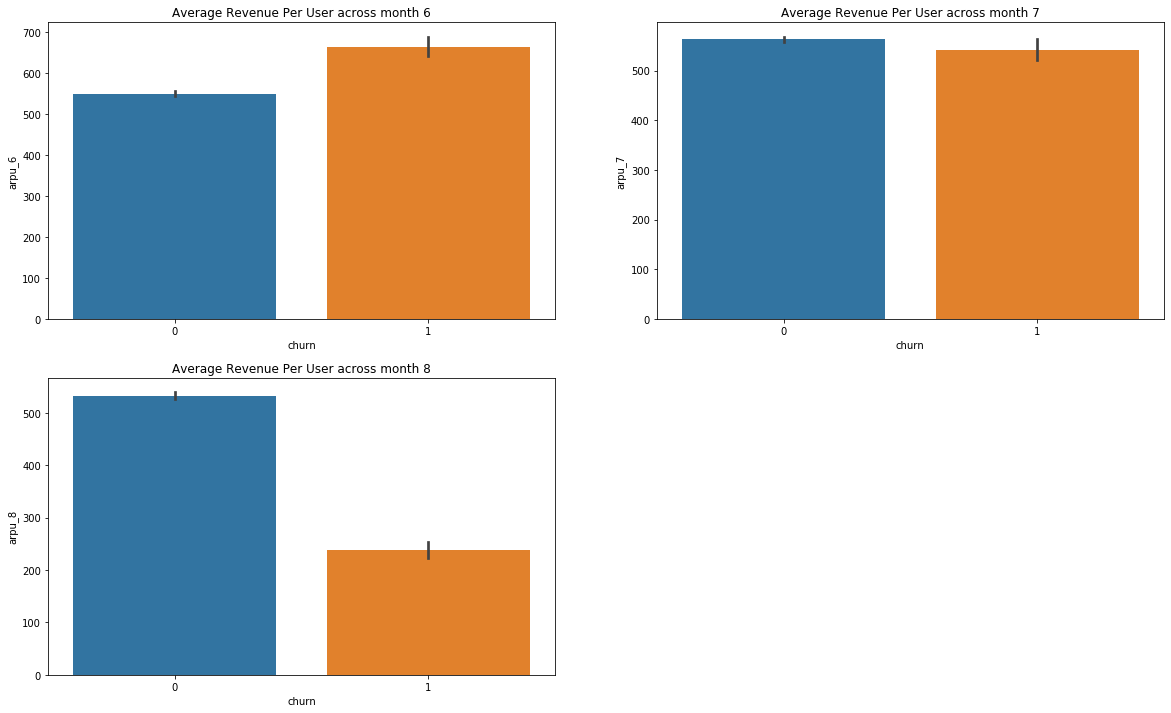

In [38]:
# Barplots of the Average Revenue Per User across 6, 7, 8 months
plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.title('Average Revenue Per User across month 6')
sns.barplot(data = filtered_df, x = 'churn', y = 'arpu_6')
plt.subplot(222)
plt.title('Average Revenue Per User across month 7')
sns.barplot(data = filtered_df, x = 'churn', y = 'arpu_7')
plt.subplot(223)
plt.title('Average Revenue Per User across month 8')
sns.barplot(data = filtered_df, x = 'churn', y = 'arpu_8')
plt.show()

#### Inference:
- From the above plot, it can clearly be observed that the Average Revenue per User was higher for Churners in the months 6 and 7 but decreased drastically in month 8
- For non-churners the Average Revenue per User has been constant throught out the months

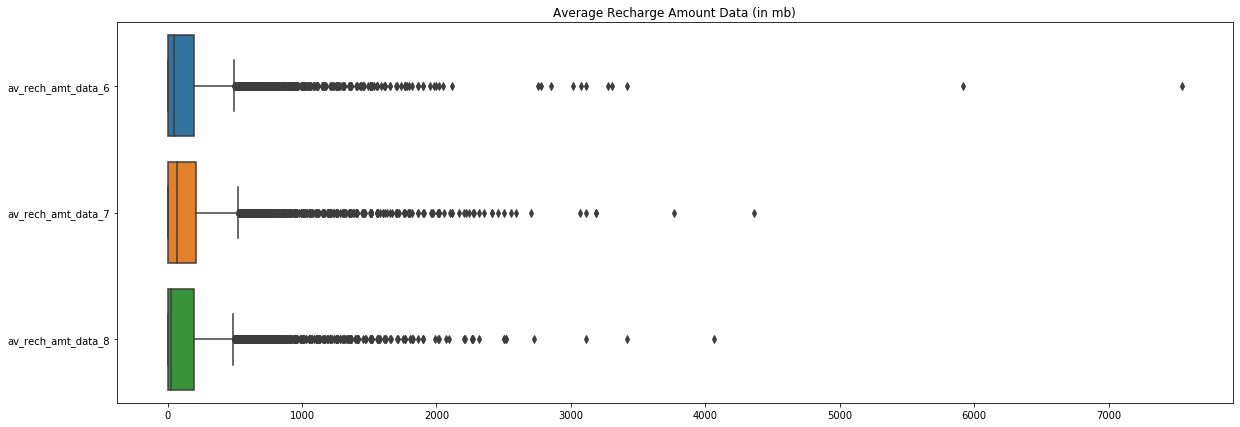

In [39]:
# Plotting boxplot of average recharge amount of data to check for outliers
plt.figure(figsize=(20,7))
plt.title('Average Recharge Amount Data (in mb)')
sns.boxplot(data = filtered_df[['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']], orient='h')
plt.show()

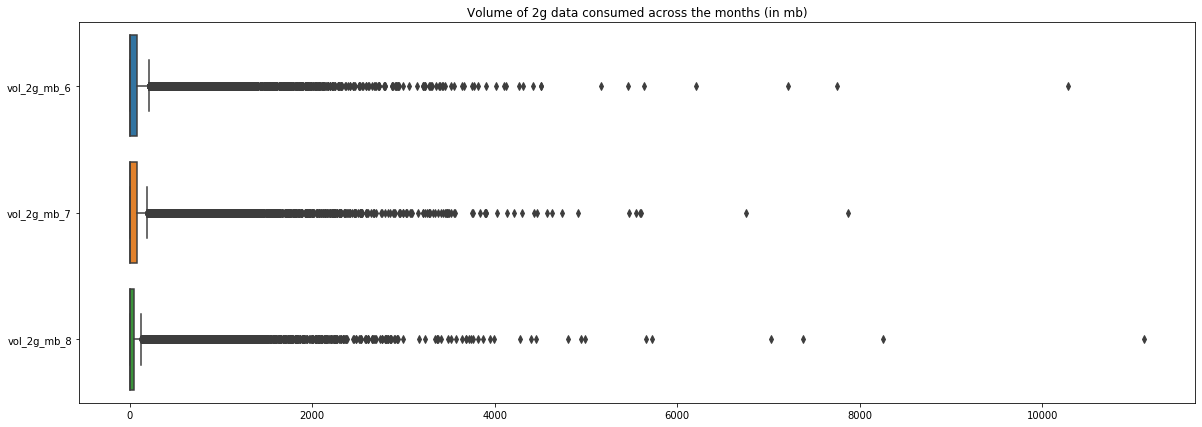

In [40]:
# Plotting Volume of 2g use across months
plt.figure(figsize=(20,7))
plt.title('Volume of 2g data consumed across the months (in mb)')
sns.boxplot(data = filtered_df[['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8']], orient='h')
plt.show()

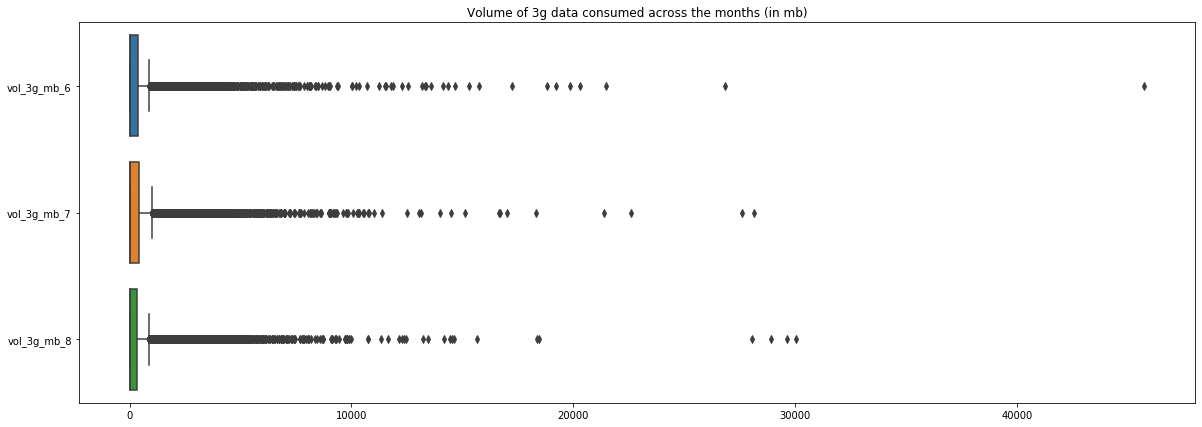

In [41]:
# Plotting Volume of 3g use across months
plt.figure(figsize=(20,7))
plt.title('Volume of 3g data consumed across the months (in mb)')
sns.boxplot(data = filtered_df[['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8']], orient='h')
plt.show()

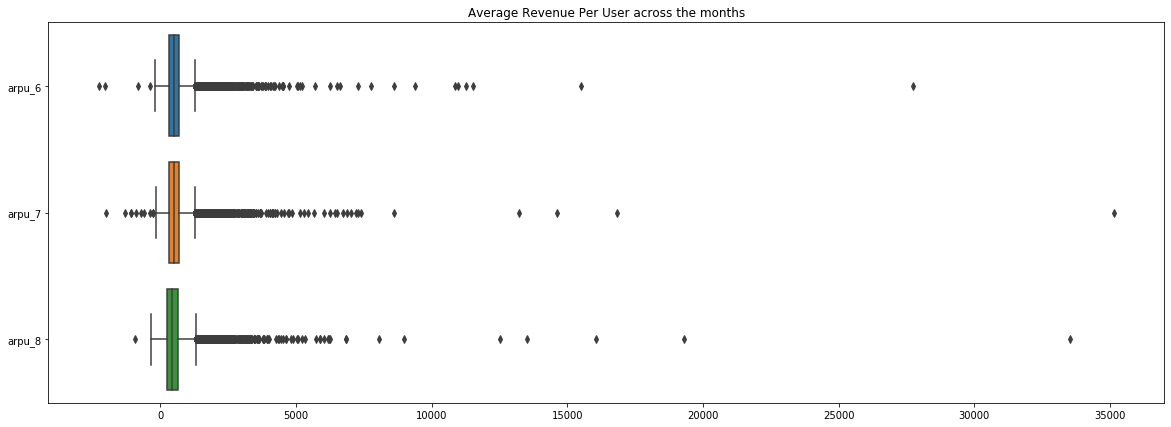

In [42]:
# Checking Boxplot of Average revenue per user(ARPU) across the months
plt.figure(figsize=(20,7))
plt.title('Average Revenue Per User across the months')
sns.boxplot(data = filtered_df[['arpu_6', 'arpu_7', 'arpu_8']], orient='h')
plt.show()

#### Inference:
- There are negative values present in the ARPU plots which needs to be treated

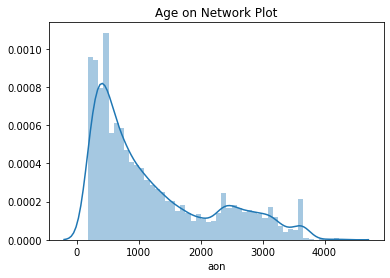

In [43]:
# Plotting the histogram of Age on Network(AON) column
sns.distplot(filtered_df['aon'])
plt.title('Age on Network Plot')
plt.show()

#### Inference:
- The mode Age on Network for the customers according to the above plot is around 500

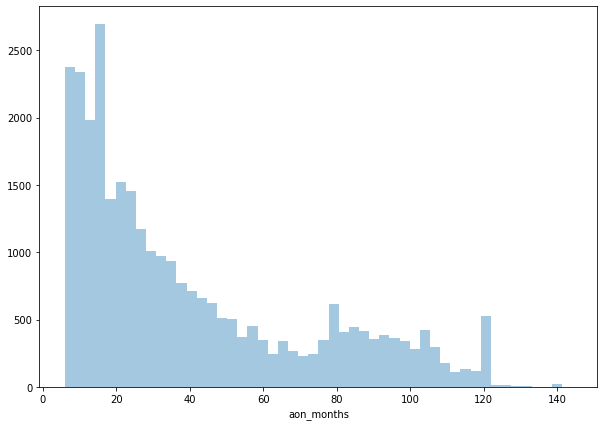

In [44]:
# Experimenting with AON network
aon_data = filtered_df.copy()
aon_data['aon_months']  = aon_data['aon'] / 30
plt.figure(figsize=(10, 7))
sns.distplot(aon_data['aon_months'], hist=True, kde=False,)
plt.show()

#### Inference:
- The AON can be binned into months i.e., '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above'

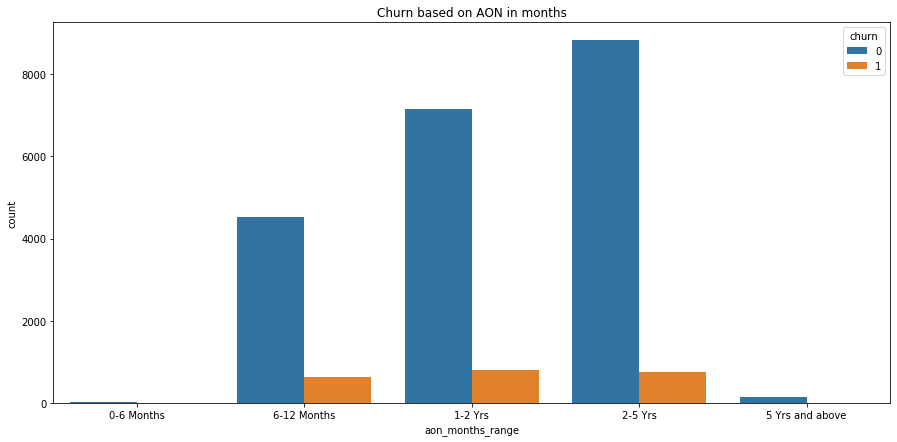

In [45]:
cut_range = [0, 6, 12, 24, 60, 61]
labels = ['0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
aon_data['aon_months_range'] = pd.cut(aon_data['aon_months'], cut_range, labels=labels)
plt.figure(figsize=(15, 7))
sns.countplot(x = 'aon_months_range', data = aon_data, hue = 'churn')
plt.title('Churn based on AON in months')
plt.show()

#### Inference:
- From the above plot, it can clearly be observed that the customers with age on network from 1-2 Yrs have the highest churn followed by 2-5 Yrs and 6-12 months
- We can infer that, customers with age on network less than 6 months and greater than 5 yrs are less likely to churn

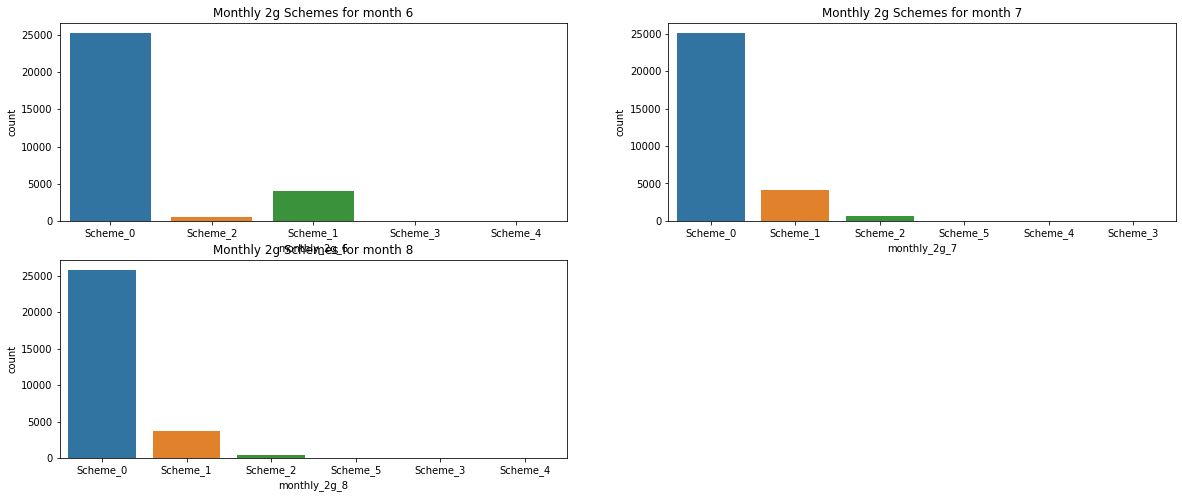

In [46]:
# Plotting Monthly 2g schemes 
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
plt.title('Monthly 2g Schemes for month 6')
sns.countplot(filtered_df['monthly_2g_6'])
plt.subplot(2,2,2)
plt.title('Monthly 2g Schemes for month 7')
sns.countplot(filtered_df['monthly_2g_7'])
plt.subplot(2,2,3)
plt.title('Monthly 2g Schemes for month 8')
sns.countplot(filtered_df['monthly_2g_8'])
plt.show()

#### Inference:
- There are total 5 monthly schemes present for 2g data
- The `Scheme_0` is doing the best across all months

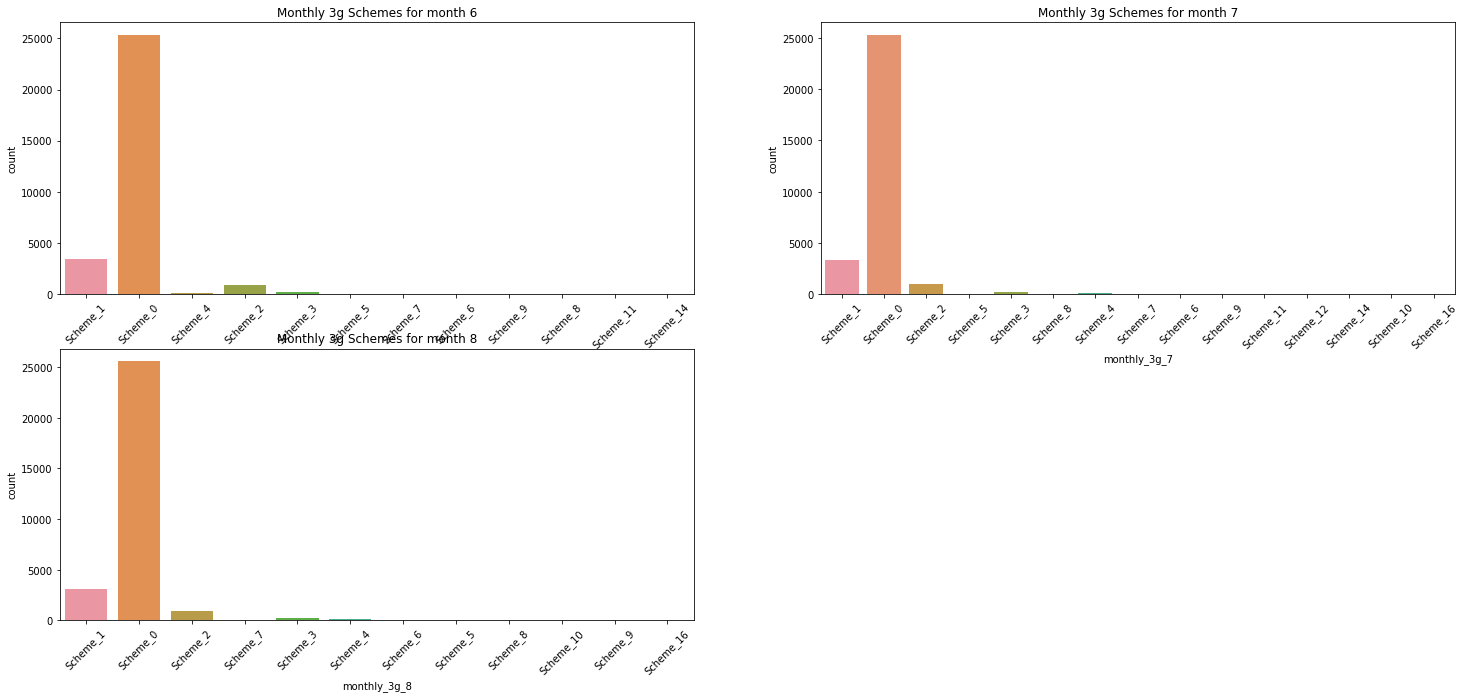

In [47]:
# Plotting Monthly 3g schemes 
plt.figure(figsize=(25,11))
plt.subplot(2,2,1)
plt.title('Monthly 3g Schemes for month 6')
sns.countplot(filtered_df['monthly_3g_6'])
plt.xticks(rotation=45)
plt.subplot(2,2,2)
plt.title('Monthly 3g Schemes for month 7')
sns.countplot(filtered_df['monthly_3g_7'])
plt.xticks(rotation=45)
plt.subplot(2,2,3)
plt.title('Monthly 3g Schemes for month 8')
sns.countplot(filtered_df['monthly_3g_8'])
plt.xticks(rotation=45)
plt.show()

#### Inference:
- There are a total of 14 monthly schemes for 3g data
- `Scheme_0` seems to be doing the best with count around 25000

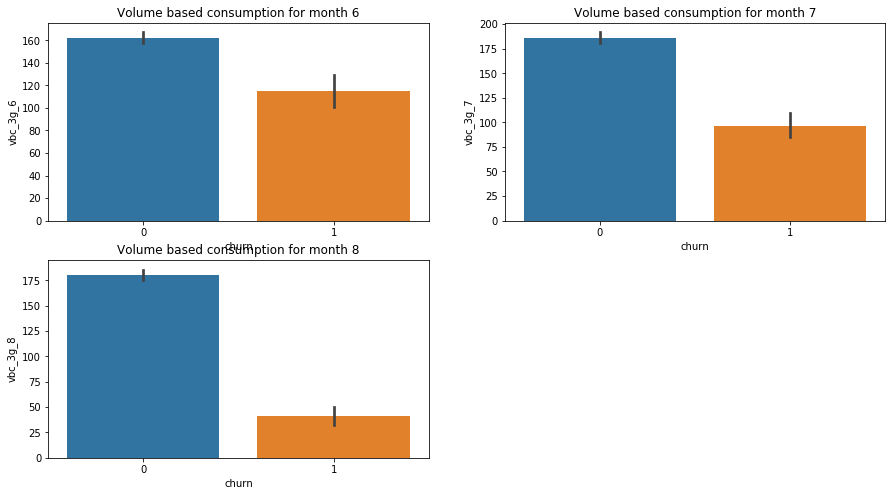

In [48]:
# Plotting VBC across months 
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.title('Volume based consumption for month 6')
sns.barplot(x = 'churn', y = 'vbc_3g_6', data = filtered_df)
plt.subplot(2,2,2)
plt.title('Volume based consumption for month 7')
sns.barplot(x = 'churn', y = 'vbc_3g_7', data = filtered_df)
plt.subplot(2,2,3)
plt.title('Volume based consumption for month 8')
sns.barplot(x = 'churn', y = 'vbc_3g_8', data = filtered_df)
plt.show()

#### Inferece:
- There is a gradual decline in volume based consumption among the churners, whereas it has been constant for the non-churners

In [49]:
#Creating the final dataframe for
final_df = filtered_df.copy()

final_df.drop(final_df.columns[final_df.columns.str.contains('date|sachet|monthly')], 1, inplace=True) # Dropping date, sachet, monthly columns as they will not be used

final_df.drop(final_df.columns[final_df.columns.str.contains('total_average_rech_amt_6_7 ')], 1, inplace=True)

drop_cols = final_df.columns[final_df.columns.str.contains('_6|_7')]
col_6_7 = final_df.filter(regex='_6|_7').columns.str[:-2]

for idx, col in enumerate(col_6_7.unique()):
    try:
        avg_col_name = col+"_avg_67"
        col_6 = col+"_6"
        col_7 = col+"_7"
        final_df[avg_col_name] = (final_df[col_6]  + final_df[col_7])/ 2
    except:
        print('Couldn\'nt find the column:',col)
    
final_df.drop(drop_cols,axis=1,inplace=True)
print (final_df.shape)

Couldn'nt find the column: total_average_rech_amt_6
(29953, 72)


In [50]:
# Head of final dataframe for modeling
final_df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,aon,vbc_3g_8,total_rech_amt_data_8,churn,arpu_avg_67,onnet_mou_avg_67,offnet_mou_avg_67,roam_ic_mou_avg_67,roam_og_mou_avg_67,loc_og_t2t_mou_avg_67,loc_og_t2m_mou_avg_67,loc_og_t2f_mou_avg_67,loc_og_t2c_mou_avg_67,std_og_t2t_mou_avg_67,std_og_t2m_mou_avg_67,std_og_t2f_mou_avg_67,isd_og_mou_avg_67,spl_og_mou_avg_67,og_others_avg_67,loc_ic_t2t_mou_avg_67,loc_ic_t2m_mou_avg_67,loc_ic_t2f_mou_avg_67,std_ic_t2t_mou_avg_67,std_ic_t2m_mou_avg_67,std_ic_t2f_mou_avg_67,spl_ic_mou_avg_67,isd_ic_mou_avg_67,ic_others_avg_67,total_rech_num_avg_67,total_rech_amt_avg_67,max_rech_amt_avg_67,last_day_rch_amt_avg_67,total_rech_data_avg_67,max_rech_data_avg_67,av_rech_amt_data_avg_67,vol_2g_mb_avg_67,vol_3g_mb_avg_67,vbc_3g_avg_67,total_rech_amt_data_avg_67
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.16,4.13,1.15,0.00,0.00,0.00,0.0,0.00,0.00,2,252,252,252,1.0,252.0,252.0,5.75,109.61,968,30.40,252.0,1,206.1005,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.00,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.5,307.0,252.0,252.0,1.0,252.0,252.0,15.725,117.165,50.600,252.0
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,12.01,49.14,16.68,10.01,6.50,0.0,27.31,121.19,39.53,30.39,141.33,22.21,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.0,0.00,0.00,802,57.74,0.0,1,1209.5150,56.26,510.295,24.86,18.165,41.385,378.005,58.635,0.0,13.795,40.825,13.37,0.090,2.25,0.0,45.200,219.525,126.810,24.360,109.215,43.215,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.0,0.0,0.000,0.000,19.060,0.0
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,22.58,75.69,0.00,0.00,10.23,0.0,0.31,15.48,0.00,0.10,0.65,0.00,0.0,0.00,0.00,14,120,30,10,3.0,23.0,69.0,0.03,11.94,315,21.03,207.0,0,435.4720,382.36,87.645,0.00,0.000,257.360,75.770,0.000,0.0,124.995,11.865,0.00,0.000,0.00,0.0,16.840,35.780,0.000,0.290,13.255,0.000,0.000,0.000,0.000,20.0,519.0,122.0,25.0,1.0,77.0,88.5,178.000,375.475,516.405,177.0
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,61.79,876.99,0.00,0.00,0.00,0.0,19.54,129.16,10.39,0.18,101.74,0.00,0.0,0.00,0.00,27,718,50,50,0.0,0.0,0.0,0.00,0.00,720,0.00,0.0,0,556.1030,117.26,827.305,0.00,0.000,5.320,89.870,0.375,0.0,111.935,737.050,0.00,0.000,0.00,0.0,6.335,96.430,3.725,10.020,52.960,0.000,0.000,0.000,0.000,24.0,640.0,50.0,25.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0
23,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,0.00,39.61,0.00,0.00,17.71,0.0,76.64,146.84,0.71,13.38,43.91,0.00,0.0,3.74,13.06,4,439,179,0,2.0,179.0,270.0,0.01,1009.92,604,40.45,540.0,0,134.1235,49.81,87.385,0.00,0.000,49.810,82.975,0.000,0.0,0.000,4.355,0.00,0.005,0.05,0.0,40.875,104.635,0.000,0.255,8.660,0.000,0.000,14.115,2.675,4.0,227.0,89.5,89.5,1.0,89.5,178.0,0.240,299.545,25.930,356.0


## 4. Data Preparation

Objectives:
- Dealing with outliers in data
- Dividing data into X and y, and splitting data into training set and test set
- Scaling the data
- Fixing class imbalance

### Dealing with outliers

In [51]:
# Describing the numerical data to check for outliers
final_df.describe(percentiles=[0, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 0.995, 0.996, 0.997, 0.998, 0.999])

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,aon,vbc_3g_8,total_rech_amt_data_8,churn,arpu_avg_67,onnet_mou_avg_67,offnet_mou_avg_67,roam_ic_mou_avg_67,roam_og_mou_avg_67,loc_og_t2t_mou_avg_67,loc_og_t2m_mou_avg_67,loc_og_t2f_mou_avg_67,loc_og_t2c_mou_avg_67,std_og_t2t_mou_avg_67,std_og_t2m_mou_avg_67,std_og_t2f_mou_avg_67,isd_og_mou_avg_67,spl_og_mou_avg_67,og_others_avg_67,loc_ic_t2t_mou_avg_67,loc_ic_t2m_mou_avg_67,loc_ic_t2f_mou_avg_67,std_ic_t2t_mou_avg_67,std_ic_t2m_mou_avg_67,std_ic_t2f_mou_avg_67,spl_ic_mou_avg_67,isd_ic_mou_avg_67,ic_others_avg_67,total_rech_num_avg_67,total_rech_amt_avg_67,max_rech_amt_avg_67,last_day_rch_amt_avg_67,total_rech_data_avg_67,max_rech_data_avg_67,av_rech_amt_data_avg_67,vol_2g_mb_avg_67,vol_3g_mb_avg_67,vbc_3g_avg_67,total_rech_amt_data_avg_67
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.00000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,508.890301,235.611433,338.728259,12.512269,19.889295,78.612305,153.389261,5.891865,1.701889,148.587258,157.452478,1.586742,1.952078,6.549024,0.057694,63.289618,148.582700,14.451269,13.919836,27.999790,2.564944,0.026548,11.015061,1.226167,9.975595,584.712416,160.224351,92.443061,1.623009,72.540013,122.209324,105.873758,351.830019,1209.280573,169.276670,463.640890,0.081227,559.990303,264.476312,376.016754,14.385073,23.375584,85.168479,163.198576,6.38742,1.733058,170.138053,183.700545,1.817327,2.142004,6.465896,0.352254,66.097918,151.093198,15.669084,15.164835,30.020398,2.750325,0.040407,11.347098,1.328511,11.789220,661.028762,170.814810,100.655878,1.762762,79.010717,135.348290,125.818200,357.604327,168.894747,492.672953
std,502.136278,458.146928,479.804499,74.179181,104.799622,227.393840,232.849024,19.516259,7.147606,397.838396,408.986370,10.940142,44.747769,20.289977,3.317780,158.809096,213.738468,43.323693,71.387685,103.353716,19.912581,0.110617,70.655796,12.793386,9.276133,611.474081,173.298179,145.247315,2.997534,110.612367,195.645691,313.058933,919.528372,957.449442,421.128001,1623.839242,0.273188,430.142954,439.846658,457.874180,66.114974,93.321022,222.442596,232.307400,20.96983,6.479556,385.840944,394.079094,11.538453,44.755704,17.314013,2.466343,157.266020,207.117758,44.381007,75.110128,94.002897,17.922169,0.150729,73.290462,13.738805,8.635731,515.462761,154.288193,115.992005,2.708014,103.245264,182.091835,299.869268,840.511247,392.995414,1239.408758
min,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.0000

#### Inference:
- From the above description of numerical data, it can clearly be observed that there are outliers in most of the columns
- Capping the outliers below 1% and above 99.9% would address the outliers

In [52]:
# Soft capping outliers with 1% and 99%
for col in final_df.select_dtypes(['int64', 'float64']).columns:
    min_quantile = np.quantile(final_df[col], 0.01)
    max_quantile = np.quantile(final_df[col], 0.999)
    final_df[col] = final_df[col].apply(lambda x: min_quantile if (x < min_quantile) else max_quantile if (x > max_quantile) else x)

In [53]:
final_df.describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,aon,vbc_3g_8,total_rech_amt_data_8,churn,arpu_avg_67,onnet_mou_avg_67,offnet_mou_avg_67,roam_ic_mou_avg_67,roam_og_mou_avg_67,loc_og_t2t_mou_avg_67,loc_og_t2m_mou_avg_67,loc_og_t2f_mou_avg_67,loc_og_t2c_mou_avg_67,std_og_t2t_mou_avg_67,std_og_t2m_mou_avg_67,std_og_t2f_mou_avg_67,isd_og_mou_avg_67,spl_og_mou_avg_67,og_others_avg_67,loc_ic_t2t_mou_avg_67,loc_ic_t2m_mou_avg_67,loc_ic_t2f_mou_avg_67,std_ic_t2t_mou_avg_67,std_ic_t2m_mou_avg_67,std_ic_t2f_mou_avg_67,spl_ic_mou_avg_67,isd_ic_mou_avg_67,ic_others_avg_67,total_rech_num_avg_67,total_rech_amt_avg_67,max_rech_amt_avg_67,last_day_rch_amt_avg_67,total_rech_data_avg_67,max_rech_data_avg_67,av_rech_amt_data_avg_67,vol_2g_mb_avg_67,vol_3g_mb_avg_67,vbc_3g_avg_67,total_rech_amt_data_avg_67
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,505.153547,233.959234,337.178043,11.930954,19.312676,77.211027,152.776061,5.773457,1.634544,147.354260,155.973766,1.507599,1.485054,6.414408,0.013727,62.508755,147.883388,14.184502,13.224580,27.317516,2.301747,0.026292,10.532400,1.060111,9.955397,580.389586,159.436217,91.127234,1.611406,72.350048,121.713364,104.506283,346.639297,1209.105933,167.809252,449.603184,0.081227,557.168676,263.458706,375.023444,13.975925,23.077743,84.190816,162.682010,6.236708,1.670697,168.991604,182.747207,1.734957,1.609780,6.329919,0.324574,65.263425,150.583929,15.436435,14.452397,29.439970,2.568870,0.039035,10.767044,1.157416,11.776416,657.309821,170.416252,100.148598,1.755140,78.757353,134.745529,124.717332,352.869596,167.831315,484.932653
std,418.336392,437.614981,458.163660,59.899490,91.876687,196.467198,225.833535,17.012930,5.657951,382.617663,384.270771,9.085688,16.642557,17.316499,0.259192,144.863508,204.783827,38.321844,52.455667,86.500054,11.376400,0.104041,59.243293,6.677464,9.075557,506.547271,161.460394,126.178792,2.856715,108.584179,190.111653,290.764999,828.555596,956.773913,401.660521,1276.800979,0.273188,356.137120,429.039552,447.600292,57.337170,88.431540,205.940795,226.893637,17.360110,4.913649,373.004908,382.950969,9.686745,14.801025,13.969019,0.999358,141.553927,200.774811,40.292394,52.426182,82.743856,11.975915,0.090290,55.418972,6.850390,8.475911,420.630290,148.301083,109.273173,2.625042,100.636847,174.073618,284.656639,760.613218,380.760273,1092.842528
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,188.000000,0.000000,0.0

### Diving data into X and y and train and test sets

In [54]:
# Making a function for splitting the data
def split_data(df):
    X = df.drop('churn', 1)
    y = df['churn']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 101, stratify= y)
    print('X_train shape: {}, X_test shape:{}'.format(X_train.shape, X_test.shape))
    print('y_train shape: {}, y_test shape:{}'.format(y_train.shape, y_test.shape))
    return X_train, X_test, y_train, y_test

def scale_data(X_train, X_test):
    scalar = StandardScaler()
    X_cols = X_train.columns
    X_train_scaled = pd.DataFrame(scalar.fit_transform(X_train), columns =[X_cols])
    X_test_scaled = pd.DataFrame(scalar.transform(X_test), columns =[X_cols])
    return X_train_scaled, X_test_scaled
  

X_train, X_test, y_train, y_test = split_data(final_df)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

X_train shape: (20967, 71), X_test shape:(8986, 71)
y_train shape: (20967,), y_test shape:(8986,)


### Fixing class imbalance

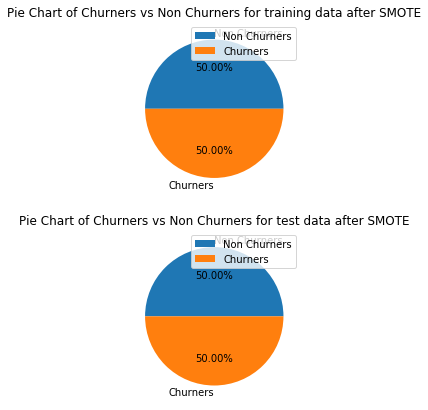

In [55]:
smote = SMOTE(random_state = 101)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
X_test_smote, y_test_smote = smote.fit_resample(X_test_scaled, y_test)

plt.figure(figsize=(11,7))
plt.subplot(211)
plt.pie(y_train_smote.value_counts(normalize=True), labels=['Non Churners', 'Churners'], autopct='%.2f%%')
plt.legend(loc='best')
plt.title('Pie Chart of Churners vs Non Churners for training data after SMOTE')
plt.subplot(212)
plt.pie(y_test_smote.value_counts(normalize=True), labels=['Non Churners', 'Churners'], autopct='%.2f%%')
plt.legend(loc='best')
plt.title('Pie Chart of Churners vs Non Churners for test data after SMOTE')
plt.show()

In [56]:
print("X_train_smote shape:{}, y_train_smote shape:{}".format(X_train_smote.shape, y_train_smote.shape))
print("X_test_smote shape:{}, y_test_smote shape:{}".format(X_test_smote.shape, y_test_smote.shape))

X_train_smote shape:(38528, 71), y_train_smote shape:(38528,)
X_test_smote shape:(16512, 71), y_test_smote shape:(16512,)


## 5. Modeling

#### Objectives:
- Building 3 models with PCA
- Building 1 model without PCA
- Hypertune parameters for all models
- Evaluating the models

### PCA Models

In [57]:
# PCA Model
pca = PCA(random_state = 101)
pca_model = pca.fit(X_train_smote)

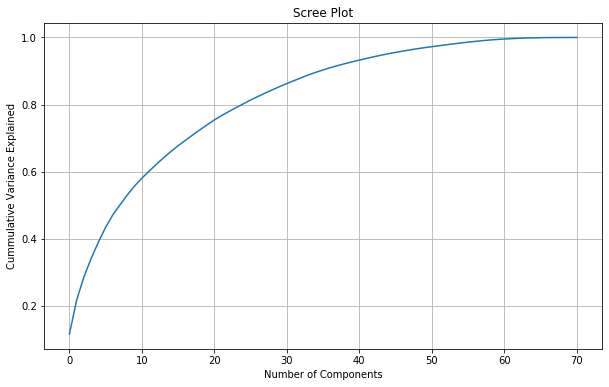

In [58]:
# Plotting Screeplot of Explained variance ratio
var_cumsum = np.cumsum(pca_model.explained_variance_ratio_)
plt.figure(figsize=(10,6))
plt.plot(var_cumsum)
plt.grid(b=True, which='major', axis='both')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Variance Explained')
plt.show()

In [59]:
# Printing cumsum of explained variance ratio
print(np.round(100*var_cumsum, 2))

[ 11.56  21.7   28.58  34.11  38.98  43.39  47.14  50.14  53.08  55.72
  58.04  60.13  62.19  64.14  65.99  67.71  69.31  70.88  72.44  73.96
  75.4   76.7   77.91  79.08  80.22  81.33  82.39  83.4   84.38  85.33
  86.26  87.13  88.    88.85  89.6   90.3   91.    91.6   92.17  92.72
  93.25  93.75  94.24  94.72  95.15  95.55  95.93  96.3   96.65  96.96
  97.25  97.54  97.82  98.09  98.36  98.6   98.83  99.04  99.24  99.4
  99.54  99.65  99.75  99.83  99.88  99.93  99.96  99.98  99.99 100.
 100.  ]


#### Inferece:
- According to the above plot and information, ideal number of components would be 45 as it explains the 95% of the variance in the data

In [60]:
# Building final PCA Model
pca_final = IncrementalPCA(n_components = 45)
X_train_pca = pca_final.fit_transform(X_train_smote)
X_train_pca = pd.DataFrame(X_train_pca)
X_train_pca.columns = ["PC_"+str(n) for n in range(1,46)]
X_train_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45
0,0.586738,4.133485,-0.039903,0.929912,0.784734,0.674909,-2.283670,0.137433,1.007919,-0.919986,-2.180410,-0.987589,0.317280,-0.810265,-1.483509,1.439445,1.321241,0.953726,-0.949823,-0.905484,-1.416783,-1.388349,-0.342161,0.568276,0.311311,-0.276643,0.549750,-0.189144,-0.308528,0.343863,0.421361,0.128993,1.679156,-2.410021,-0.302263,-0.172523,0.315161,-3.154075,-1.604020,-0.204158,0.029637,1.227259,-0.466998,-0.332681,0.905893
1,-0.126762,-3.691273,-0.918540,1.905999,-3.995544,1.783200,-0.801794,1.682797,1.042400,-1.207332,0.600387,-0.535225,1.740011,1.077695,1.295205,-1.125379,0.808501,-0.542153,-0.535645,2.720559,-3.262335,-0.332700,-0.137598,0.291083,0.243373,0.257411,0.239724,-0.469886,-0.918385,1.958379,2.202925,0.105013,-1.624455,-0.253996,0.481494,-0.172213,0.862139,-0.260460,1.210785,0.351496,-0.894354,-0.099129,-0.124685,0.412132,-0.166299
2,-0.629242,4.384208,0.716467,0.937863,-0.333226,0.771315,-1.731169,-0.297636,-0.648296,0.385784,-0.953730,-0.296568,0.561688,-0.303455,-0.878316,0.111418,1.245943,0.412231,0.219868,-0.958419,-0.905421,-0.580638,-0.131372,0.294900,0.265771,0.600436,-0.430927,-0.070834,-0.113385,-0.194213,0.233671,0.223544,0.688238,-0.593530,-0.110897,-0.108045,0.290367,0.076400,-0.322607,0.087917,0.089947,0.374361,-0.584388,-0.602159,-0.501741
3,-2.909289,0.581114,0.696332,-0.973453,-0.477221,0.009694,-0.350480,-0.330015,-0.538803,0.054113,-0.229714,-0.131062,0.193386,-0.385275,-0.299861,0.594856,-0.521572,0.160643,-0.072998,-0.553066,0.579373,0.033680,0.162365,-0.062879,0.243643,-0.405707,1.904051,-0.470213,0.191162,0.260982,-0.091688,-0.341130,-0.708086,0.739170,-0.040937,-0.125513,-0.136398,0.216153,-0.150946,0.242757,-0.042683,-0.200173,0.006242,0.111547,0.084892
4,-1.305157,3.175751,0.635838,0.299914,-0.207169,0.826883,-1.260091,0.266739,0.009581,0.116588,-0.676106,-0.256556,0.258743,-0.280667,-0.567896,0.030980,0.342252,0.546429,0.047856,0.033490,0.384793,-0.294074,0.030793,0.172172,-0.058337,-0.488945,-0.069190,-0.045123,-0.014460,0.045807,-0.060566,-0.058046,0.588682,-0.762881,0.071924,0.041922,-0.241644,-0.331734,0.282055,-0.102412,-0.081375,0.272165,0.343947,0.103579,0.268248


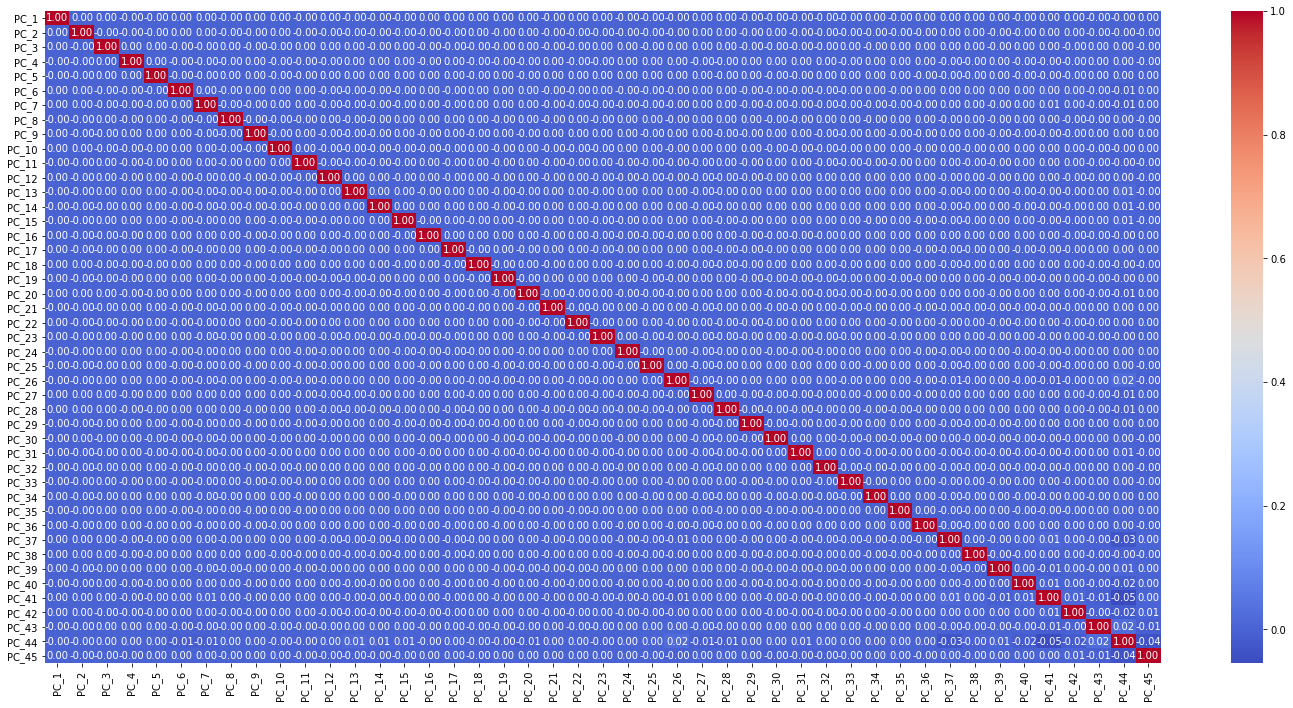

In [61]:
# Checking for correlations between vars
corr_df = X_train_pca.corr()
plt.figure(figsize=(25, 12))
sns.heatmap(corr_df, annot=True, fmt ='.2f', cmap='coolwarm')
plt.show()

In [62]:
# Building a Logit Model around it
logit_pca = LogisticRegression(random_state = 101)
logit_pca_model = logit_pca.fit(X_train_pca, y_train_smote)

In [63]:
# Making Predictions on Train Set
y_train_pred = logit_pca_model.predict(X_train_pca)
y_train_pred_proba = logit_pca_model.predict_proba(X_train_pca)
print('The ROC AUC score for train model: {}%'.format(np.round(100*metrics.roc_auc_score(y_train_smote.values, y_train_pred_proba[:,1]), 2)))

The ROC AUC score for train model: 90.71%


In [64]:
# Making Predictions on Test Set
X_test_pca = pd.DataFrame(pca_final.transform(X_test_smote), columns = ["PC_"+str(n) for n in range(1,46)])
y_test_pred = logit_pca_model.predict(X_test_pca)
y_test_pred_proba = logit_pca_model.predict_proba(X_test_pca)
print('The ROC AUC score for test model: {}%'.format(np.round(100*metrics.roc_auc_score(y_test_smote.values, y_test_pred_proba[:,1]), 2)))

The ROC AUC score for test model: 89.51%


In [65]:
# Creating a function to evaluate model
def model_eval(model, X_train, y_train, X_test, y_test, model_name=''):
    
    # Making Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Accuracy
    accuracy_train = np.round(100*metrics.accuracy_score(y_train, y_train_pred), 2)
    accuracy_test = np.round(100*metrics.accuracy_score(y_test, y_test_pred), 2)
    
    # Precision
    precision_train = np.round(100*metrics.precision_score(y_train, y_train_pred), 2)
    precision_test = np.round(100*metrics.precision_score(y_test, y_test_pred), 2)
    
    # Recall
    recall_train = np.round(100*metrics.recall_score(y_train, y_train_pred), 2)
    recall_test = np.round(100*metrics.recall_score(y_test, y_test_pred), 2)
    
    # F1 Score
    f1score_train = np.round(100*metrics.f1_score(y_train, y_train_pred), 2)
    f1score_test = np.round(100*metrics.f1_score(y_test, y_test_pred), 2)
    
    # ROC AUC Score
    roc_auc_train = np.round(100*metrics.roc_auc_score(y_train, model.predict_proba(X_train)[:,1]), 2)
    roc_auc_test = np.round(100*metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1]), 2)
    
    # Creating a dataframe
    eval_df = pd.DataFrame(data={"Train Accuracy":accuracy_train,
                            "Test Accuracy":accuracy_test,
                            "Train Precision":precision_train,
                            "Test Precision":precision_test,
                            "Train Recall":recall_train,
                            "Test Recall":recall_test,
                            "Train F1 Score":f1score_train,
                            "Test F1 Score":f1score_test,
                                 "Train ROC-AUC Score":roc_auc_train,
                                "Test ROC-AUC Score":roc_auc_test}, index = [model_name])
    return eval_df

In [66]:
models = model_eval(logit_pca_model, X_train_pca, y_train_smote, X_test_pca, y_test_smote, model_name='Logistic Regression PCA Model')
models

,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score,Train ROC-AUC Score,Test ROC-AUC Score
Logistic Regression PCA Model,83.79,82.7,82.22,81.42,86.22,84.73,84.17,83.04,90.71,89.51


#### XGBoost Model PCA

In [67]:
# Checking with basic model
xgb_clf = XGBClassifier(random_state = 101)
xgb_clf_model = xgb_clf.fit(X_train_pca, y_train_smote)

In [68]:
# Evaluating model
xgb_eval = model_eval(xgb_clf_model, X_train_pca, y_train_smote, X_test_pca, y_test_smote, 'XGB PCA Model')
models = pd.concat([models, xgb_eval])
models

,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score,Train ROC-AUC Score,Test ROC-AUC Score
Logistic Regression PCA Model,83.79,82.70,82.22,81.42,86.22,84.73,84.17,83.04,90.71,89.51
XGB PCA Model,98.94,81.68,98.10,89.67,99.82,71.61,98.95,79.63,99.95,90.58


#### Note:
- Not using the hyperparamter tuning as the system is taking too long to compute

#### Random Forrest PCA


In [69]:
# Building basic Random Forrest model
rf_clf = RandomForestClassifier(random_state = 101, n_jobs = -1)
rf_clf_model = rf_clf.fit(X_train_pca, y_train_smote)

In [70]:
# Evaluating the model
model_eval(rf_clf_model, X_train_pca, y_train_smote, X_test_pca, y_test_smote, 'Random Forrest PCA Model')

,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score,Train ROC-AUC Score,Test ROC-AUC Score
Random Forrest PCA Model,100.0,80.09,100.0,91.48,100.0,66.35,100.0,76.92,100.0,90.36


In [71]:
# Hyper parameter tuning using GridSearcCV
# params = {
#     'max_depth': [2,3,5,10,20],
#     'min_samples_leaf': [5,10,20,50],
#     'n_estimators': [10, 50, 100]
# }
# grid_search = GridSearchCV(estimator=rf_clf_model,
#                            param_grid=params,
#                            cv = 3,
#                            n_jobs=-1, verbose=1, scoring="accuracy")

# grid_search.fit(X_train_pca, y_train_smote)

In [72]:
# Printing out best params and score
# print("Best Params: ", grid_search.best_params_)
# print("Best Accuracy Score: ", grid_search.best_score_)

#### Inference:
- Best Params found `max_depth: 20, min_samples_leaf: 5, n_estimators = 100`
- The accuracy for grid_search model is 93.79%

In [73]:
# Trying another round of Hyper parameter tuning using GridSearcCV
# params = {
#     'max_depth': [20, 25, 30, 35, 40],
#     'min_samples_leaf': [2, 3, 4, 5],
#     'n_estimators': [100, 150, 200]
# }
# grid_search = GridSearchCV(estimator=rf_clf_model,
#                            param_grid=params,
#                            cv = 3,
#                            n_jobs=-1, verbose=1, scoring="accuracy")

# grid_search.fit(X_train_pca, y_train_smote)

In [74]:
# Printing out best params and score
# print("Best Params: ", grid_search.best_params_)
# print("Best Accuracy Score: ", grid_search.best_score_)

#### Inference:
- Best Params found `max_depth: 35, min_samples_leaf: 2, n_estimators = 150`
- The accuracy for grid_search model is 94.57%

#### Note:
- Commenting out the GridSearchCV as it takes up too much time to compute 

In [75]:
# Final Random Forrest Model
rf_clf_final = RandomForestClassifier(random_state = 101, max_depth = 35, min_samples_leaf = 2, n_estimators = 150)
rf_clf_final_model = rf_clf_final.fit(X_train_pca, y_train_smote)

In [76]:
# Model Evaluation
rf_final_eval = model_eval(rf_clf_final_model, X_train_pca, y_train_smote, X_test_pca, y_test_smote, 'Random Forrest PCA Model')
models = pd.concat([models, rf_final_eval])
models

,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score,Train ROC-AUC Score,Test ROC-AUC Score
Logistic Regression PCA Model,83.79,82.70,82.22,81.42,86.22,84.73,84.17,83.04,90.71,89.51
XGB PCA Model,98.94,81.68,98.10,89.67,99.82,71.61,98.95,79.63,99.95,90.58
Random Forrest PCA Model,99.79,80.75,99.61,91.34,99.98,67.94,99.79,77.92,100.00,90.39


### Model without PCA

#### Steps:
1. Feature Selection using RFE
2. Manual Feature Elimination
3. Predictions on train and test models
4. Evaluating model and getting the most important features

In [77]:
# Initializing Logit Model
logit_sm = Logit(y_train_smote, X_train_smote)
logit_sm_model = logit_sm.fit()
logit_sm_model.summary()

Optimization terminated successfully.
         Current function value: 0.478999
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                38528
Model:                          Logit   Df Residuals:                    38457
Method:                           MLE   Df Model:                           70
Date:                Mon, 01 Mar 2021   Pseudo R-squ.:                  0.3090
Time:                        23:48:42   Log-Likelihood:                -18455.
converged:                       True   LL-Null:                       -26706.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
arpu_8                         0.0144      0.060      0.242      0.808      -0.102       0.131
onnet_mou_8                    7.9202      0.358     22.129      0.000       7.219       8.622
offnet_mou_8                   8.1136      0.329     24.662      0.000       7.469       8.758
roam_ic_mou_8                 -0.0009      0.020     -0.043      0.965      -0.040       0.038
roam_og_mou_8                 -1.5543      0.068    -22.894      0.000      -1.687      -1.421
loc_og_t2t_mou_8              -3.8108      0.165    -23.046      0.000      -4.135      -3.487
loc_og_t2m_mou_8              -4.1656      0.169    -24.604      0.000      -4.497      -3.834
loc_og_t2f_mou_8              -0.3048      0.030    -10.207      0.000      -0.363      -0.246
loc_og_t2c_mou_8               0.0254      0.019      1.319      0.187      -0.012       0.063
std_og_t2t_mou_8              -7.1580      0.314    -22.762      0.000      -7.774      -6.542
std_og_t2m_mou_8              -7.0715      0.277    -25.494      0.000      -7.615      -6.528
std_og_t2f_mou_8              -0.2090      0.025     -8.308      0.000      -0.258      -0.160
isd_og_mou_8                  -0.2771      0.028     -9.817      0.000      -0.332      -0.222
spl_og_mou_8                  -0.3615      0.027    -13.613      0.000      -0.414      -0.309
og_others_8                   -0.0321      0.018     -1.832      0.067      -0.066       0.002
loc_ic_t2t_mou_8              -0.1652      0.031     -5.336      0.000      -0.226      -0.105
loc_ic_t2m_mou_8              -0.2793      0.031     -8.890      0.000      -0.341      -0.218
loc_ic_t2f_mou_8              -0.0958      0.027     -3.604      0.000      -0.148      -0.044
std_ic_t2t_mou_8              -0.1768      0.025     -6.993      0.000      -0.226      -0.127
std_ic_t2m_mou_8              -0.0792      0.022     -3.557      0.000      -0.123      -0.036
std_ic_t2f_mou_8              -0.0552      0.021     -2.570      0.010      -0.097      -0.013
spl_ic_mou_8                  -0.1961      0.017    -11.751      0.000      -0.229      -0.163
isd_ic_mou_8                  -0.1096      0.024     -4.482      0.000      -0.158      -0.062
ic_others_8                    0.0535      0.016      3.274      0.001       0.021       0.086
total_rech_num_8              -0.4223      0.033    -12.717      0.000      -0.487      -0.357
total_rech_amt_8              -0.1509      0.063     -2.381      0.017      -0.275      -0.027
max_rech_amt_8                 0.0467      0.027      1.710      0.087      -0.007       0.100
last_day_rch_amt_8            -0.2449      0.019    -12.914      0.000      -0.282      -0.208
total_rech_data_8             -0.4803      0.035    -13.572      0.000      -0.550      -0.411
max_rech_data_8               -0.1822      0.038     -4.767      0.000      -0.257      -0.107
av_rech_amt_data_8            -0.0195      0.054     -0.365      0.715      -0.124       0.085
vol_2g_mb_8

In [102]:
# RFE Feature Selection
logit_sk = LogisticRegression(random_state = 101)
logit_sk_model = logit_sk.fit(X_train_smote, y_train_smote)
rfe = RFE(logit_sk_model, 25)
rfe_model = rfe.fit(X_train_smote, y_train_smote)

rfe_cols = [i[0] for i in X_train_smote.columns[rfe_model.support_].values]
rfe_cols

['onnet_mou_8',
 'offnet_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'spl_ic_mou_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'vbc_3g_8',
 'arpu_avg_67',
 'onnet_mou_avg_67',
 'offnet_mou_avg_67',
 'roam_og_mou_avg_67',
 'loc_og_t2t_mou_avg_67',
 'loc_og_t2m_mou_avg_67',
 'std_og_t2t_mou_avg_67',
 'std_og_t2m_mou_avg_67']

In [131]:
# Filtering out the train and test data with the support columns
X_train_rfe = X_train_smote[rfe_cols]
X_test_rfe = X_test_smote[rfe_cols]

In [80]:
# Logit Model with selected features
logit_sm = Logit(y_train_smote, X_train_rfe)
logit_sm_model = logit_sm.fit()
logit_sm_model.summary()

Optimization terminated successfully.
         Current function value: 0.497237
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                38528
Model:                          Logit   Df Residuals:                    38503
Method:                           MLE   Df Model:                           24
Date:                Mon, 01 Mar 2021   Pseudo R-squ.:                  0.2826
Time:                        23:49:03   Log-Likelihood:                -19158.
converged:                       True   LL-Null:                       -26706.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
onnet_mou_8               6.2349      0.299     20.858      0.000       5.649       6.821
offnet_mou_8              5.2467      0.225     23.288      0.000       4.805       5.688
roam_og_mou_8            -0.9962      0.046    -21.691      0.000      -1.086      -0.906
loc_og_t2t_mou_8         -3.0810      0.140    -22.081      0.000      -3.355      -2.808
loc_og_t2m_mou_8         -2.7571      0.117    -23.523      0.000      -2.987      -2.527
loc_og_t2f_mou_8         -0.2293      0.020    -11.224      0.000      -0.269      -0.189
std_og_t2t_mou_8         -5.6711      0.262    -21.638      0.000      -6.185      -5.157
std_og_t2m_mou_8         -4.6522      0.189    -24.673      0.000      -5.022      -4.283
loc_ic_t2t_mou_8         -0.1404      0.021     -6.755      0.000      -0.181      -0.100
loc_ic_t2m_mou_8         -0.2277      0.022    -10.353      0.000      -0.271      -0.185
loc_ic_t2f_mou_8         -0.1155      0.020     -5.910      0.000      -0.154      -0.077
spl_ic_mou_8             -0.2237      0.017    -13.470      0.000      -0.256      -0.191
total_rech_num_8         -0.2638      0.020    -13.043      0.000      -0.303      -0.224
total_rech_amt_8         -0.5000      0.032    -15.410      0.000      -0.564      -0.436
last_day_rch_amt_8       -0.2602      0.018    -14.816      0.000      -0.295      -0.226
total_rech_data_8        -0.2864      0.018    -15.728      0.000      -0.322      -0.251
vbc_3g_8                 -0.2809      0.018    -15.402      0.000      -0.317      -0.245
arpu_avg_67               0.5513      0.028     19.445      0.000       0.496       0.607
onnet_mou_avg_67         -2.5037      0.208    -12.033      0.000      -2.912      -2.096
offnet_mou_avg_67        -2.7259      0.192    -14.171      0.000      -3.103      -2.349
roam_og_mou_avg_67        0.6509      0.040     16.259      0.000       0.572       0.729
loc_og_t2t_mou_avg_67     1.2972      0.104     12.443      0.000       1.093       1.502
loc_og_t2m_mou_avg_67     1.2878      0.103     12.474      0.000       1.085       1.490
std_og_t2t_mou_avg_67     2.3445      0.180     13.010      0.000       1.991       2.698
std_og_t2m_mou_avg_67     2.5583      0.164     15.612      0.000       2.237       2.879
=========================================================================================
"""

In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = [i[0] for i in X_train_rfe.columns.values]
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif = vif.reset_index().drop('index', 1)
vif

,Features,VIF
0,onnet_mou_avg_67,184.08
1,offnet_mou_avg_67,165.20
2,std_og_t2t_mou_avg_67,153.95
3,std_og_t2m_mou_avg_67,135.59
4,offnet_mou_8,90.20
5,onnet_mou_8,77.57
6,std_og_t2t_mou_8,60.38
7,std_og_t2m_mou_8,59.46
8,loc_og_t2t_mou_avg_67,33.71
9,loc_og_t2m_mou_avg_67,32.36


In [82]:
#Dropping 'onnet_mou_avg_67' col as it has extremely high VIF
drop_col = vif['Features'][0]
rfe_cols.remove(drop_col)
X_train_rfe = X_train_rfe[rfe_cols]

In [83]:
# Creating a function to get top 10 VIFs and p-values and columns
def get_p_val_vif_df(X_train, y_train):
    cols = [i[0] for i in X_train.columns.values]
    model = Logit(y_train, X_train).fit()
    pval_df = pd.DataFrame(model.pvalues.sort_values(ascending=False)).reset_index()
    pval_df.columns = ['p-val column', 'p-value']
    pval_df['p-value'] = pval_df['p-value'].apply(lambda x: np.round(x, 2))
    vif = pd.DataFrame()
    vif['VIF Column'] = [i[0] for i in X_train_rfe.columns.values]
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif = vif.reset_index().drop('index', 1)
    combined = pd.concat([pval_df, vif], 1)
    return combined[:10]

In [129]:
# Automating the high p-value and VIF column functuon
def drop_auto(threshold_p = 0.05, threshold_v = 5):
    global X_train_rfe, y_train_smote
    df = get_p_val_vif_df(X_train_rfe, y_train_smote)
    max_p = df['p-value'][0]
    max_vif = df['VIF'][0]
    while(max_p > threshold_p) | (max_vif > threshold_v):
        if max_p > threshold_p:
            col = df['p-val column'][0]
            print('-'*100)
            print('Dropping col ({}) as it has a high p-value: {}'.format(col, max_p))
            print('-'*100)
            X_train_rfe = X_train_rfe.drop(col, 1)
            df = get_p_val_vif_df(X_train_rfe, y_train_smote)
            max_p = df['p-value'][0]
            max_vif = df['VIF'][0]

        elif max_vif > 5:
            col = df['VIF Column'][0]
            print('-'*100)
            print('Dropping col ({}) as it has a high VIF: {}'.format(col, max_vif))
            print('-'*100)
            X_train_rfe = X_train_rfe.drop(col, 1)
            df = get_p_val_vif_df(X_train_rfe, y_train_smote)
            max_p = df['p-value'][0]
            max_vif = df['VIF'][0]

    print('-'*100)
    print("The high p-values and VIF values columns are dealt with!")
    print('-'*100)

In [132]:
drop_auto()

Optimization terminated successfully.
         Current function value: 0.497237
         Iterations 7
----------------------------------------------------------------------------------------------------
Dropping col (onnet_mou_avg_67) as it has a high VIF: 184.08
----------------------------------------------------------------------------------------------------
Optimization terminated successfully.
         Current function value: 0.498959
         Iterations 7
----------------------------------------------------------------------------------------------------
Dropping col (offnet_mou_avg_67) as it has a high VIF: 132.77
----------------------------------------------------------------------------------------------------
Optimization terminated successfully.
         Current function value: 0.500163
         Iterations 7
----------------------------------------------------------------------------------------------------
Dropping col (onnet_mou_8) as it has a high VIF: 55.62
-----------

In [119]:
count = 0
while(count != 7):
    
    count +=1

Optimization terminated successfully.
         Current function value: 0.497237
         Iterations 7
----------------------------------------------------------------------------------------------------
Dropping col (onnet_mou_avg_67) as it has a high VIF: 184.08
----------------------------------------------------------------------------------------------------
Optimization terminated successfully.
         Current function value: 0.498959
         Iterations 7
----------------------------------------------------------------------------------------------------
Dropping col (offnet_mou_avg_67) as it has a high VIF: 132.77
----------------------------------------------------------------------------------------------------
Optimization terminated successfully.
         Current function value: 0.500163
         Iterations 7
----------------------------------------------------------------------------------------------------
Dropping col (onnet_mou_8) as it has a high VIF: 55.62
-----------

In [133]:
logit_sm = Logit(y_train_smote, X_train_rfe)
logit_sm_model = logit_sm.fit()
logit_sm_model.summary()

Optimization terminated successfully.
         Current function value: 0.511776
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                38528
Model:                          Logit   Df Residuals:                    38509
Method:                           MLE   Df Model:                           18
Date:                Tue, 02 Mar 2021   Pseudo R-squ.:                  0.2617
Time:                        21:22:34   Log-Likelihood:                -19718.
converged:                       True   LL-Null:                       -26706.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
loc_og_t2t_mou_8         -0.2839      0.031     -9.155      0.000      -0.345      -0.223
loc_og_t2m_mou_8         -0.2491      0.029     -8.448      0.000      -0.307      -0.191
loc_og_t2f_mou_8         -0.1328      0.019     -6.916      0.000      -0.170      -0.095
std_og_t2t_mou_8         -0.3690      0.023    -16.172      0.000      -0.414      -0.324
std_og_t2m_mou_8         -0.4438      0.025    -18.064      0.000      -0.492      -0.396
loc_ic_t2t_mou_8         -0.1940      0.022     -8.673      0.000      -0.238      -0.150
loc_ic_t2m_mou_8         -0.2565      0.022    -11.413      0.000      -0.301      -0.212
loc_ic_t2f_mou_8         -0.1521      0.020     -7.456      0.000      -0.192      -0.112
spl_ic_mou_8             -0.2438      0.017    -14.532      0.000      -0.277      -0.211
total_rech_num_8         -0.4064      0.019    -21.273      0.000      -0.444      -0.369
last_day_rch_amt_8       -0.3966      0.016    -25.584      0.000      -0.427      -0.366
total_rech_data_8        -0.3520      0.019    -18.929      0.000      -0.388      -0.316
vbc_3g_8                 -0.3530      0.018    -19.460      0.000      -0.389      -0.317
arpu_avg_67               0.3250      0.021     15.547      0.000       0.284       0.366
roam_og_mou_avg_67        0.1404      0.014     10.009      0.000       0.113       0.168
loc_og_t2t_mou_avg_67     0.1193      0.025      4.702      0.000       0.070       0.169
loc_og_t2m_mou_avg_67    -0.0663      0.025     -2.675      0.007      -0.115      -0.018
std_og_t2t_mou_avg_67     0.2411      0.022     10.925      0.000       0.198       0.284
std_og_t2m_mou_avg_67     0.3069      0.023     13.528      0.000       0.262       0.351
=========================================================================================
"""

#### Inference:
- The high p-values and VIFs causing multicollinearity are dealt with

In [134]:
# Final Model
cols = [i[0] for i in X_train_rfe.columns.values]
X_test_rfe = X_test_rfe[cols]

logit_sm_final_model = Logit(y_train_smote, X_train_rfe).fit()
y_train_pred = pd.DataFrame()
y_train_pred['Actual'] = y_train_smote
y_train_pred['Predicted Prob'] = logit_sm_final_model.predict(X_train_rfe)
y_train_pred.head()

Optimization terminated successfully.
         Current function value: 0.511776
         Iterations 6


,Actual,Predicted Prob
0,0,0.203170
1,0,0.979304
2,0,0.375836
3,0,0.788824
4,0,0.636561


In [135]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred[i]= y_train_pred['Predicted Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred.head()

,Actual,Predicted Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.203170,1,1,1,0,0,0,0,0,0,0
1,0,0.979304,1,1,1,1,1,1,1,1,1,1
2,0,0.375836,1,1,1,1,0,0,0,0,0,0
3,0,0.788824,1,1,1,1,1,1,1,1,0,0
4,0,0.636561,1,1,1,1,1,1,1,0,0,0


In [136]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred['Actual'],y_train_pred[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.527487  0.997456  0.057517
0.2   0.2  0.563928  0.994446  0.133409
0.3   0.3  0.608544  0.986400  0.230689
0.4   0.4  0.663933  0.975602  0.352263
0.5   0.5  0.727627  0.955772  0.499481
0.6   0.6  0.792826  0.918086  0.667566
0.7   0.7  0.833316  0.841674  0.824958
0.8   0.8  0.770011  0.606416  0.933607
0.9   0.9  0.596190  0.210341  0.982039


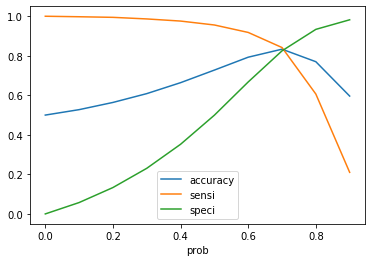

In [137]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Inference:
- From the above data, we can conclude that 0.7 would be a good cut-off

In [138]:
# Creating a new column for predicted value with above optimized cut off
y_train_pred['Predicted'] = y_train_pred['Predicted Prob'].apply(lambda x: 1 if x > 0.7 else 0)
y_train_pred.head()

,Actual,Predicted Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
0,0,0.203170,1,1,1,0,0,0,0,0,0,0,0
1,0,0.979304,1,1,1,1,1,1,1,1,1,1,1
2,0,0.375836,1,1,1,1,0,0,0,0,0,0,0
3,0,0.788824,1,1,1,1,1,1,1,1,0,0,1
4,0,0.636561,1,1,1,1,1,1,1,0,0,0,0


In [139]:
# Making Predictions on Test Set
y_test_pred = pd.DataFrame()
y_test_pred['Predicted Prob'] = logit_sm_final_model.predict(X_test_rfe)
y_test_pred['Predicted'] = y_test_pred['Predicted Prob'].apply(lambda x: 1 if x > 0.7 else 0)

In [140]:
print("Classification Report for Train Data")
print()
print(metrics.classification_report(y_train_smote, y_train_pred['Predicted']))

Classification Report for Train Data

              precision    recall  f1-score   support

           0       0.84      0.82      0.83     19264
           1       0.83      0.84      0.83     19264

    accuracy                           0.83     38528
   macro avg       0.83      0.83      0.83     38528
weighted avg       0.83      0.83      0.83     38528



In [141]:
print("Classification Report for Test Data")
print()
print(metrics.classification_report(y_test_smote, y_test_pred['Predicted']))

Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      8256
           1       0.82      0.83      0.82      8256

    accuracy                           0.82     16512
   macro avg       0.82      0.82      0.82     16512
weighted avg       0.82      0.82      0.82     16512



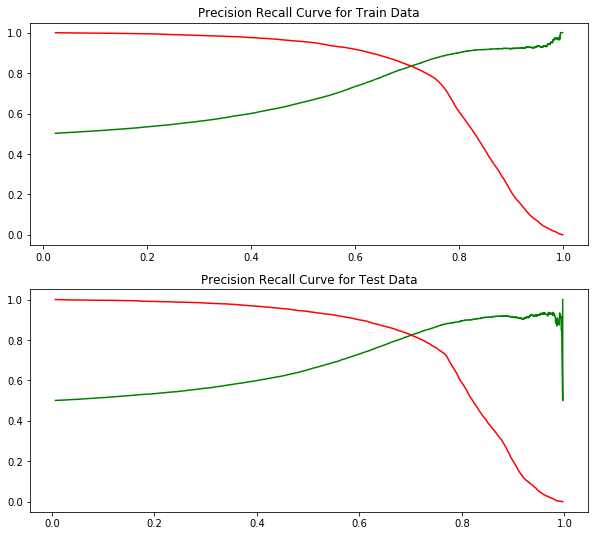

In [142]:
# Precision Recall Curve
plt.figure(figsize=(10,9))
p, r, thresholds = metrics.precision_recall_curve(y_train_smote, y_train_pred['Predicted Prob'])
plt.subplot(211)
plt.title('Precision Recall Curve for Train Data')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
p, r, thresholds = metrics.precision_recall_curve(y_test_smote, y_test_pred['Predicted Prob'])
plt.subplot(212)
plt.title('Precision Recall Curve for Test Data')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [143]:
# Function for ROC AUCCurve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

<Figure size 720x648 with 0 Axes>

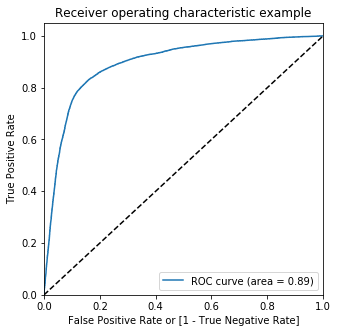

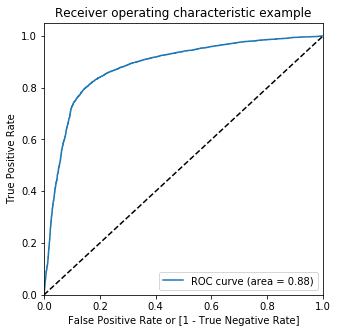

In [144]:
# Plotting ROC AUC Curve for Training and Test Data
plt.figure(figsize=(10,9))
draw_roc(y_train_smote, y_train_pred['Predicted Prob'])
draw_roc(y_test_smote, y_test_pred['Predicted Prob'])

In [145]:
logit_sm_final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                38528
Model:                          Logit   Df Residuals:                    38509
Method:                           MLE   Df Model:                           18
Date:                Tue, 02 Mar 2021   Pseudo R-squ.:                  0.2617
Time:                        21:23:29   Log-Likelihood:                -19718.
converged:                       True   LL-Null:                       -26706.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
loc_og_t2t_mou_8         -0.2839      0.031     -9.155      0.000      -0.345      -0.223
loc_og_t2m_mou_8         -0.2491      0.029     -8.448      0.000      -0.307      -0.191
loc_og_t2f_mou_8         -0.1328      0.019     -6.916      0.000      -0.170      -0.095
std_og_t2t_mou_8         -0.3690      0.023    -16.172      0.000      -0.414      -0.324
std_og_t2m_mou_8         -0.4438      0.025    -18.064      0.000      -0.492      -0.396
loc_ic_t2t_mou_8         -0.1940      0.022     -8.673      0.000      -0.238      -0.150
loc_ic_t2m_mou_8         -0.2565      0.022    -11.413      0.000      -0.301      -0.212
loc_ic_t2f_mou_8         -0.1521      0.020     -7.456      0.000      -0.192      -0.112
spl_ic_mou_8             -0.2438      0.017    -14.532      0.000      -0.277      -0.211
total_rech_num_8         -0.4064      0.019    -21.273      0.000      -0.444      -0.369
last_day_rch_amt_8       -0.3966      0.016    -25.584      0.000      -0.427      -0.366
total_rech_data_8        -0.3520      0.019    -18.929      0.000      -0.388      -0.316
vbc_3g_8                 -0.3530      0.018    -19.460      0.000      -0.389      -0.317
arpu_avg_67               0.3250      0.021     15.547      0.000       0.284       0.366
roam_og_mou_avg_67        0.1404      0.014     10.009      0.000       0.113       0.168
loc_og_t2t_mou_avg_67     0.1193      0.025      4.702      0.000       0.070       0.169
loc_og_t2m_mou_avg_67    -0.0663      0.025     -2.675      0.007      -0.115      -0.018
std_og_t2t_mou_avg_67     0.2411      0.022     10.925      0.000       0.198       0.284
std_og_t2m_mou_avg_67     0.3069      0.023     13.528      0.000       0.262       0.351
=========================================================================================
"""

In [146]:
# Evaluating the Logstic Regression model without PCA
accuracy_train = metrics.accuracy_score(y_train_smote, y_train_pred['Predicted'])
accuracy_test = metrics.accuracy_score(y_test_smote, y_test_pred['Predicted'])
precision_train = metrics.precision_score(y_train_smote, y_train_pred['Predicted'])
precision_test = metrics.precision_score(y_test_smote, y_test_pred['Predicted'])
recall_train = metrics.recall_score(y_train_smote, y_train_pred['Predicted'])
recall_test = metrics.recall_score(y_test_smote, y_test_pred['Predicted'])
f1score_train = metrics.f1_score(y_train_smote, y_train_pred['Predicted'])
f1score_test = metrics.f1_score(y_test_smote, y_test_pred['Predicted'])
rocauc_train = metrics.roc_auc_score(y_train_smote, y_train_pred['Predicted Prob'])
rocauc_test = metrics.roc_auc_score(y_test_smote, y_test_pred['Predicted Prob'])
log_model = np.array([accuracy_train, accuracy_test, precision_train,  precision_test, recall_train, recall_test,
            f1score_train, f1score_test, rocauc_train, rocauc_test])

# Combining the result with all the modesl data
df = pd.DataFrame(log_model).T
df.columns = models.columns
df.index = ['Logistic Regression without PCA']
models = pd.concat([models, df])
models.loc['Logistic Regression without PCA',:] = models.loc['Logistic Regression without PCA',:]*100

In [147]:
# Final Result dataframe including all models
models

,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score,Train ROC-AUC Score,Test ROC-AUC Score
Logistic Regression PCA Model,83.790000,82.700000,82.220000,81.420000,86.220000,84.730000,84.170000,83.040000,90.710000,89.510000
XGB PCA Model,98.940000,81.680000,98.100000,89.670000,99.820000,71.610000,98.950000,79.630000,99.950000,90.580000
Random Forrest PCA Model,99.790000,80.750000,99.610000,91.340000,99.980000,67.940000,99.790000,77.920000,100.000000,90.390000
Logistic Regression without PCA,83.331603,82.364341,82.783621,82.262738,84.167359,82.521802,83.469755,82.392067,89.447652,88.165844


In [148]:
# Getting the importance of features
logit_sm_final_model.params.sort_values(ascending=False)

arpu_avg_67              0.325018
std_og_t2m_mou_avg_67    0.306932
std_og_t2t_mou_avg_67    0.241124
roam_og_mou_avg_67       0.140361
loc_og_t2t_mou_avg_67    0.119313
loc_og_t2m_mou_avg_67   -0.066329
loc_og_t2f_mou_8        -0.132821
loc_ic_t2f_mou_8        -0.152084
loc_ic_t2t_mou_8        -0.194021
spl_ic_mou_8            -0.243766
loc_og_t2m_mou_8        -0.249146
loc_ic_t2m_mou_8        -0.256539
loc_og_t2t_mou_8        -0.283887
total_rech_data_8       -0.352002
vbc_3g_8                -0.353014
std_og_t2t_mou_8        -0.369038
last_day_rch_amt_8      -0.396581
total_rech_num_8        -0.406448
std_og_t2m_mou_8        -0.443788
dtype: float64

#### Inferences:
- We can observe that the variables `std_og_t2m_mou_8, total_rech_num_8, last_day_rch_amt_8, std_og_t2t_mou_8, vbc_3g_8, total_rech_data_8` have a high negative coefficient, which means the customers with low values in the mentioned variables are more likely to churn.
- The variables `arpu_avg_67, std_og_t2m_mou_avg_67` have a high positive coefficient values, which means that customers with high values in the mentioned variables are more likely to churn. 

## 6. Business Recommendations

#### Recommendation 1:
- The customers generating high average revenue and high STD outgoing minutes of usage from operator T to other mobile operater in the good phase i.e., month 6 and 7 with an average age on network from 6 months to 5 years are more likely to churn.
- Markup the customers who meet the above criterion for follow up

#### Recommedation 2:
- It has been observed that there is a drastic decrease in the following features for customers who are more likely to churn in the action phase i.e., month 8:
>1. STD outgoing minutes of usage from operator T to other mobile operater and with operator T
>2. Total number of recharges
>3. Volume based usage of 3g
>4. Total recharge for data
- Check whether the customers marked up in the good phase are exhibiting the above behavior criteria

#### Recommendation 3:
- It has been observed that Scheme_0 in monthly and sachet 2g, 3g rechages is doing the best across all the months 6, 7 and 8.
- We can follow up with a text message to the marked up customers who are likely to churn and recommend them the Scheme_0

#### Recommendation 4:
- If no response received even after the follow up, a call can be placed to the marked up customers requesting them to provide feedback as to why they are not happy with the service.
- Additionally, a custom pack of monthly recharge can be tailored to fit the needs of the customers of both data and outgoing call usage 